# <h>Heart Disease analysis with classification</h>

**Authors:** Lola Sõukand, Robin Mürk

**Data:** https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/discussion

Aim is to build a binary classifier that predicts a person's risk of a heart attack and to analyse individual attributes to determine what lowers and what increases the risk of heart attack using regression analysis.

**Goal 1:** train a model to predict whether or not a patient is at high risk or at low risk of a heart attack.<br>
**Goal 2:** find factors,that lower the risk of heart attack <br>
**Goal 3:** find factors, that increase the risk of heart attack <br>

------------------------------------------  

## Initial data viewing

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
plt.style.use('ggplot')
data=pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
data = data.astype(int)
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,0,1,1,1,18,0,0,2,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [23]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   Diabetes              253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

                  column      No     Yes
0   HeartDiseaseorAttack  229787   23893
1                 HighBP  144851  108829
2               HighChol  146089  107591
3              CholCheck    9470  244210
4                 Smoker  141257  112423
5                 Stroke  243388   10292
6           PhysActivity   61760  191920
7                 Fruits   92782  160898
8                Veggies   47839  205841
9      HvyAlcoholConsump  239424   14256
10         AnyHealthcare   12417  241263
11           NoDocbcCost  232326   21354
12              DiffWalk  211005   42675


<Axes: title={'center': 'How many yes/no answers from questionnaire?'}, xlabel='column'>

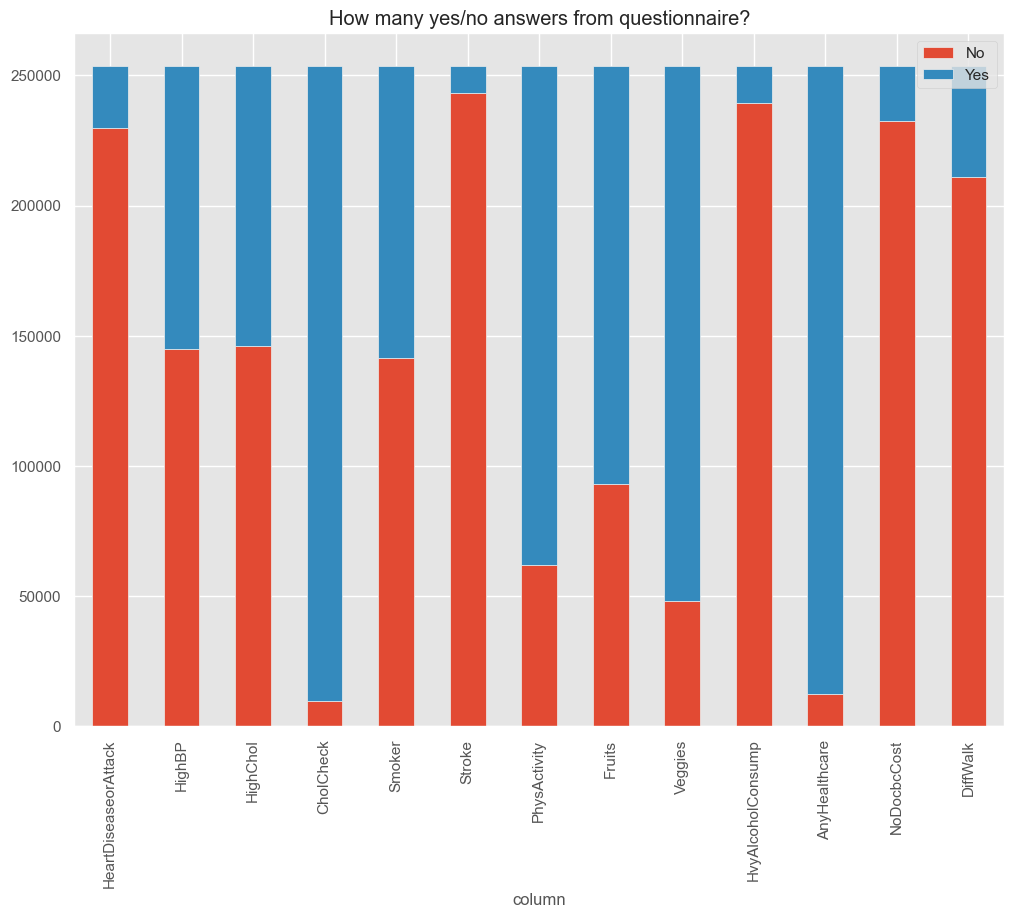

In [25]:
#Binary column plot

#making a new data frame
counts_df = pd.DataFrame(columns=['column', 'No', 'Yes'])

#counting binary values for columns where there is binary values
for col in ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 
       'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']:
    counts1 = data[col].value_counts()[1.0]
    counts0 = data[col].value_counts()[0.0]
    
    counts_df = pd.concat([counts_df, pd.DataFrame([{'column': col, 'No': counts0, 'Yes': counts1}])], ignore_index=True)
print(counts_df)

#making the plot
counts_df.plot.bar(x='column', stacked=True, title='How many yes/no answers from questionnaire?')

(868, 22)


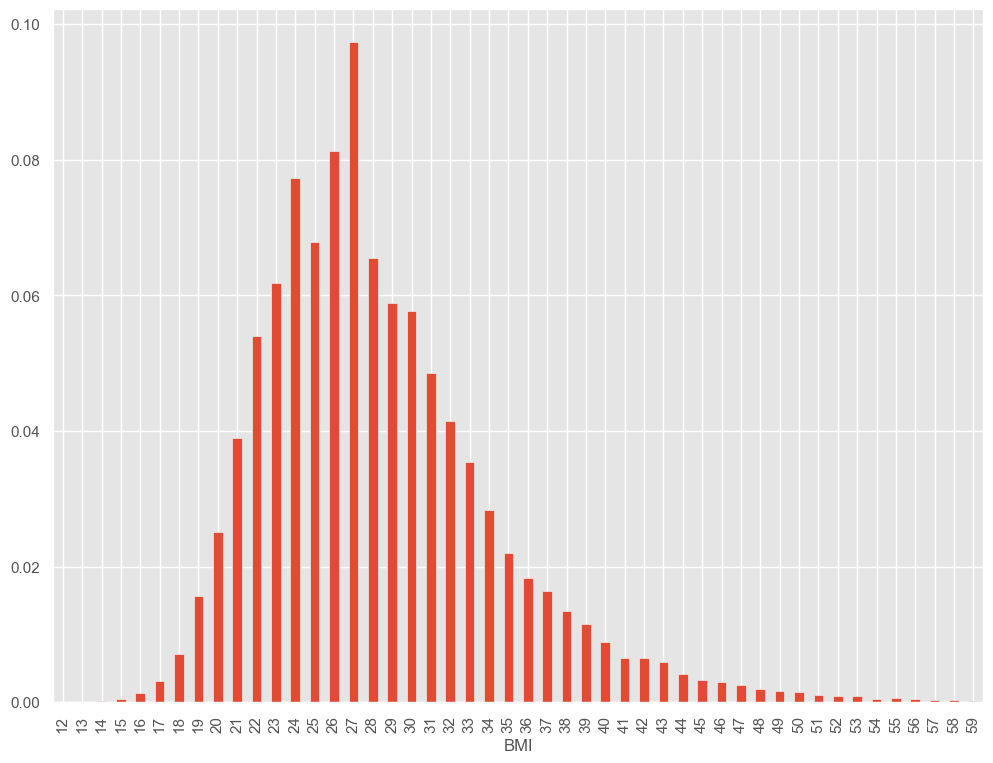

In [26]:
#BMI count plot, BMI under 60
data[data['BMI'] < 60]['BMI'].value_counts(normalize=True).sort_index().plot(kind="bar")
print(data[data['BMI'] >= 60].shape) ## added by Robin

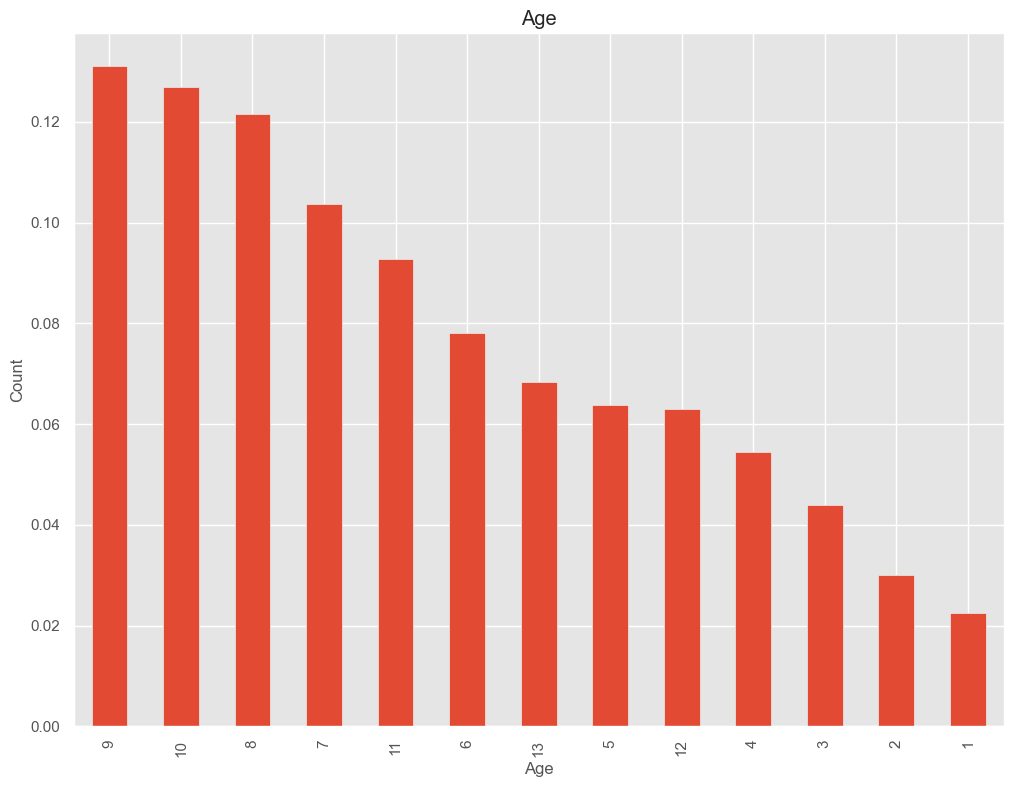

In [27]:
#age plot
data['Age'].value_counts(normalize=True).plot(kind="bar")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age')
plt.show()

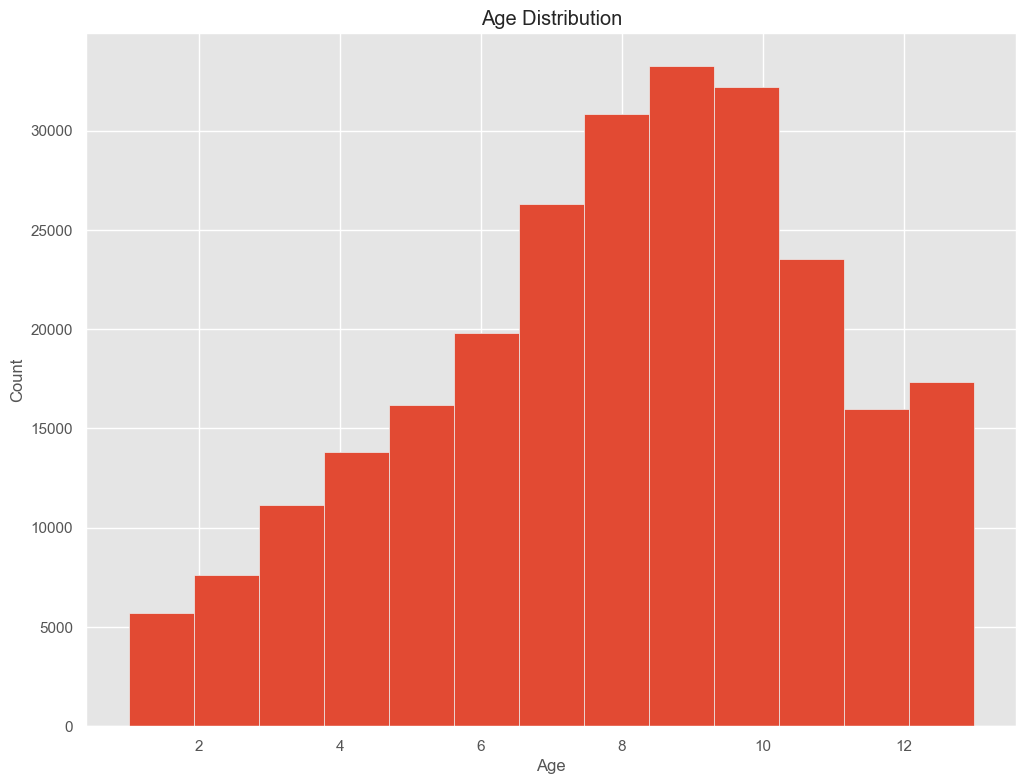

In [28]:
#age distrubution plot
plt.hist(data['Age'], bins=13)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

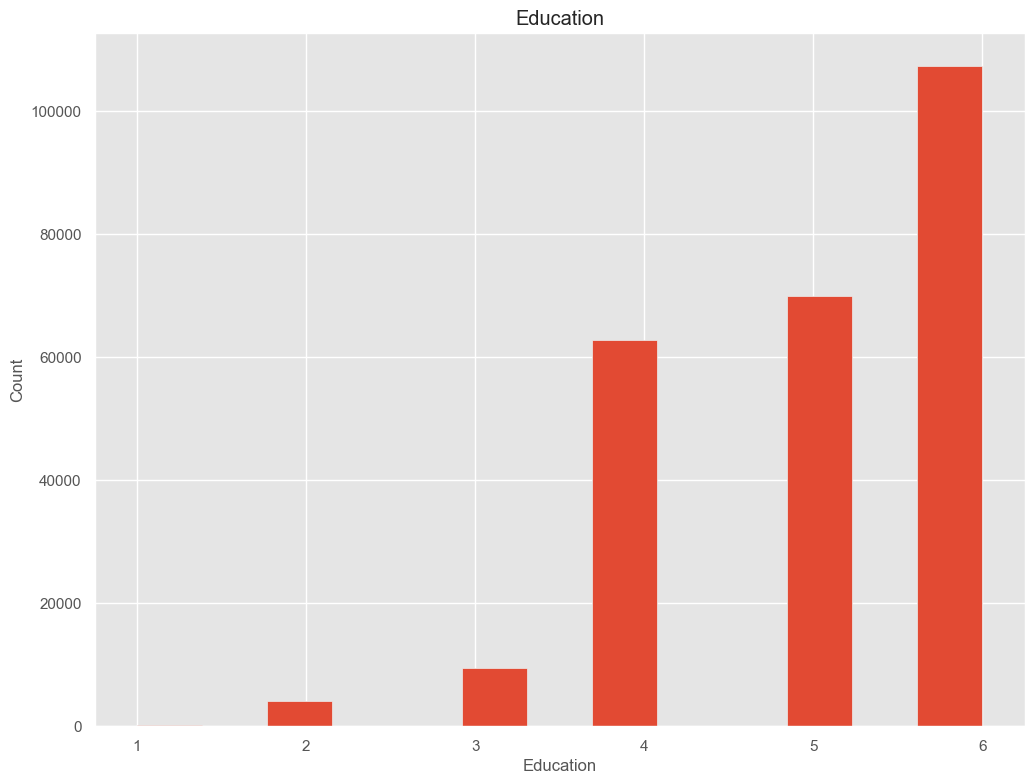

In [29]:
#age distrubution plot
plt.hist(data['Education'], bins=13)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education')
plt.show()

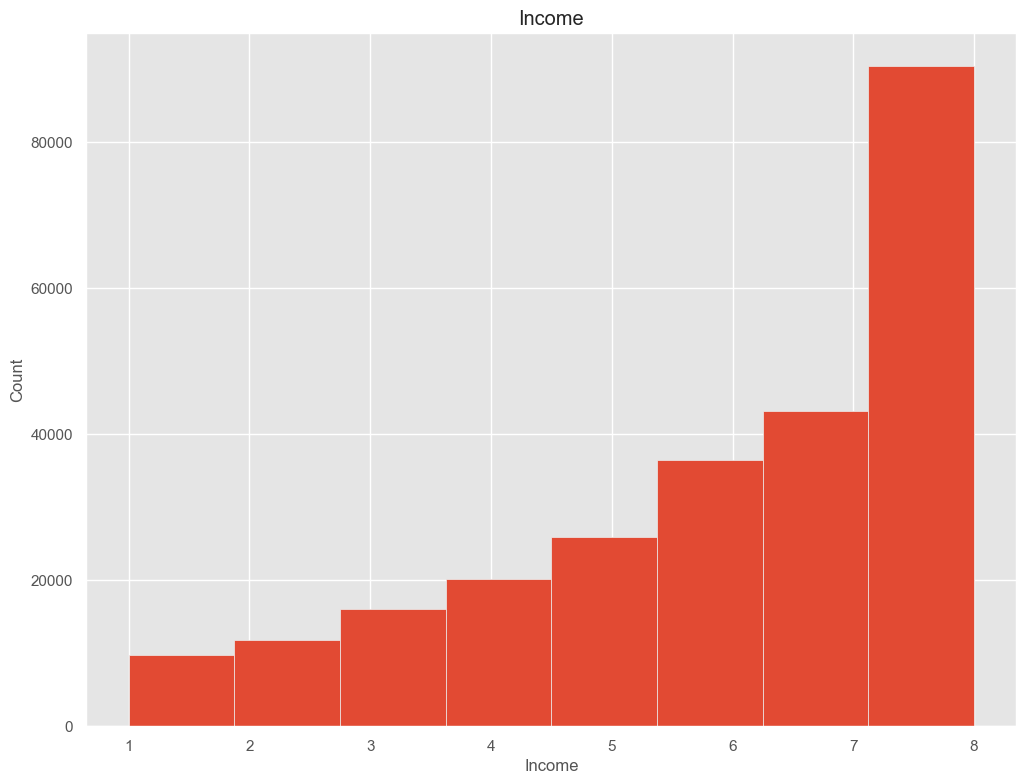

In [30]:
# income plot
data['Income'].hist(bins=8)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income')
plt.show()

----------------------------------------
# Correlations and p-value

<Axes: >

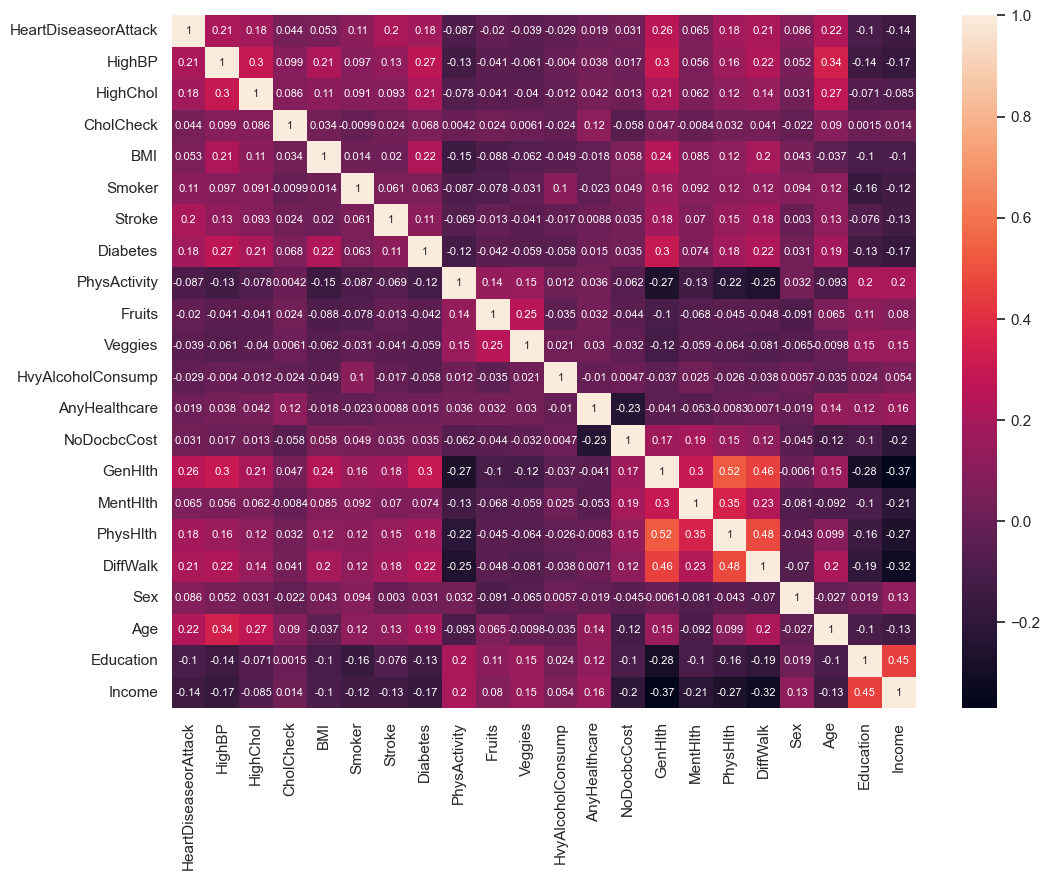

In [31]:
#correlations heatmap
corr_matrix = data.corr()
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(corr_matrix, annot=True,annot_kws={"size": 8})

In [32]:
from scipy.stats import pointbiserialr

#correlations
corr_matrix = np.zeros((len(data.columns), len(data.columns)))
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        if i == j:
            corr_matrix[i][j] = 1
        else:
            corr, p_value = pointbiserialr(data.iloc[:, i], data.iloc[:, j])
            corr_matrix[i][j] = corr
corr_df = pd.DataFrame(corr_matrix, columns=data.columns, index=data.columns)
print(corr_df['HeartDiseaseorAttack'].abs().sort_values(ascending=False)) 

HeartDiseaseorAttack    1.000000
GenHlth                 0.258383
Age                     0.221618
DiffWalk                0.212709
HighBP                  0.209361
Stroke                  0.203002
PhysHlth                0.181698
HighChol                0.180765
Diabetes                0.180272
Income                  0.141011
Smoker                  0.114441
Education               0.099600
PhysActivity            0.087299
Sex                     0.086096
MentHlth                0.064621
BMI                     0.052904
CholCheck               0.044206
Veggies                 0.039167
NoDocbcCost             0.031000
HvyAlcoholConsump       0.028991
Fruits                  0.019790
AnyHealthcare           0.018734
Name: HeartDiseaseorAttack, dtype: float64


In [33]:
#p-value with Pearson test
for column in data.columns[1:]:
    corr,p_value = pearsonr(data[column], data['HeartDiseaseorAttack'])
    print(f'The correlation between heart disease and {column}  is {corr:.2f} with a p-value of {p_value:.2e}')

The correlation between heart disease and HighBP  is 0.21 with a p-value of 0.00e+00
The correlation between heart disease and HighChol  is 0.18 with a p-value of 0.00e+00
The correlation between heart disease and CholCheck  is 0.04 with a p-value of 6.35e-110
The correlation between heart disease and BMI  is 0.05 with a p-value of 1.21e-156
The correlation between heart disease and Smoker  is 0.11 with a p-value of 0.00e+00
The correlation between heart disease and Stroke  is 0.20 with a p-value of 0.00e+00
The correlation between heart disease and Diabetes  is 0.18 with a p-value of 0.00e+00
The correlation between heart disease and PhysActivity  is -0.09 with a p-value of 0.00e+00
The correlation between heart disease and Fruits  is -0.02 with a p-value of 2.09e-23
The correlation between heart disease and Veggies  is -0.04 with a p-value of 1.08e-86
The correlation between heart disease and HvyAlcoholConsump  is -0.03 with a p-value of 2.63e-48
The correlation between heart disease

In [34]:
from scipy.stats import pointbiserialr
# p-value with pointbiserial
for column in data.columns[1:]:
    if data[column].dtype == int and set(data[column].unique()) == {0, 1}:
        corr, p_value = pointbiserialr(data[column], data['HeartDiseaseorAttack'])
        print(f'The point-biserial correlation between heart disease and {column} is {corr:.2f} with a p-value of {p_value:.2e}')
    else:
        print(f'Skipping {column} as it does not contain binary numeric data (0 or 1).')

The point-biserial correlation between heart disease and HighBP is 0.21 with a p-value of 0.00e+00
The point-biserial correlation between heart disease and HighChol is 0.18 with a p-value of 0.00e+00
The point-biserial correlation between heart disease and CholCheck is 0.04 with a p-value of 6.35e-110
Skipping BMI as it does not contain binary numeric data (0 or 1).
The point-biserial correlation between heart disease and Smoker is 0.11 with a p-value of 0.00e+00
The point-biserial correlation between heart disease and Stroke is 0.20 with a p-value of 0.00e+00
Skipping Diabetes as it does not contain binary numeric data (0 or 1).
The point-biserial correlation between heart disease and PhysActivity is -0.09 with a p-value of 0.00e+00
The point-biserial correlation between heart disease and Fruits is -0.02 with a p-value of 2.09e-23
The point-biserial correlation between heart disease and Veggies is -0.04 with a p-value of 1.08e-86
The point-biserial correlation between heart disease an

In [35]:
from scipy.stats import spearmanr
# p-value with spearman
for column in corr_df.columns:
    corr, p_value = spearmanr(data[column], data['HeartDiseaseorAttack'])
    print(f"The correlation between variable1 and {column} is {corr:.2f} with a p-value of {p_value:.2e}")

The correlation between variable1 and HeartDiseaseorAttack is 1.00 with a p-value of 0.00e+00
The correlation between variable1 and HighBP is 0.21 with a p-value of 0.00e+00
The correlation between variable1 and HighChol is 0.18 with a p-value of 0.00e+00
The correlation between variable1 and CholCheck is 0.04 with a p-value of 6.35e-110
The correlation between variable1 and BMI is 0.06 with a p-value of 5.12e-226
The correlation between variable1 and Smoker is 0.11 with a p-value of 0.00e+00
The correlation between variable1 and Stroke is 0.20 with a p-value of 0.00e+00
The correlation between variable1 and Diabetes is 0.18 with a p-value of 0.00e+00
The correlation between variable1 and PhysActivity is -0.09 with a p-value of 0.00e+00
The correlation between variable1 and Fruits is -0.02 with a p-value of 2.09e-23
The correlation between variable1 and Veggies is -0.04 with a p-value of 1.08e-86
The correlation between variable1 and HvyAlcoholConsump is -0.03 with a p-value of 2.63e-4

In [36]:
from scipy.stats import chi2_contingency
#p-value with chi-squared test
for column in data.columns:
    contingency_table = pd.crosstab(data[column], data['HeartDiseaseorAttack'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"The chi-squared statistic is {chi2:.2f} with a p-value of {p_value:.2e}")

The chi-squared statistic is 253668.28 with a p-value of 0.00e+00
The chi-squared statistic is 11117.88 with a p-value of 0.00e+00
The chi-squared statistic is 8288.02 with a p-value of 0.00e+00
The chi-squared statistic is 494.93 with a p-value of 1.20e-109
The chi-squared statistic is 1251.19 with a p-value of 7.40e-208
The chi-squared statistic is 3321.61 with a p-value of 0.00e+00
The chi-squared statistic is 10450.58 with a p-value of 0.00e+00
The chi-squared statistic is 8244.89 with a p-value of 0.00e+00
The chi-squared statistic is 1932.63 with a p-value of 0.00e+00
The chi-squared statistic is 99.22 with a p-value of 2.27e-23
The chi-squared statistic is 388.82 with a p-value of 1.49e-86
The chi-squared statistic is 212.77 with a p-value of 3.41e-48
The chi-squared statistic is 88.74 with a p-value of 4.51e-21
The chi-squared statistic is 243.40 with a p-value of 7.14e-55
The chi-squared statistic is 19008.16 with a p-value of 0.00e+00
The chi-squared statistic is 1299.47 with

----------------------------------
# Data visualization

In [37]:
# making copy of data and deleting the data rows if the value count in the column is lower than 1%
data_copy = data.copy()

for column in[ 'BMI', 'MentHlth','PhysHlth', 'Education']:
    threshold_count = 0.005 * data_copy[column].count()
    data_copy = data_copy[data_copy.groupby(column)[column].transform('count') >= threshold_count]

In [38]:
# making plot
def plot_figure(pivot_table, title, xpos):
    ax = pivot_table.plot.bar(stacked=True, figsize=(10, 10), color=['#3c91e6', '#d33f49']) # making the plot and setting the colors and size
    labels = []
    min_font_size = 11  # setting a min font size for readability
    percentage_threshold = 3  # displaying % labels if bars are above this threshold

    #making the labels
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))): # if the column is too small the label is empty for readability
                label = ""
            else:                                                                                                                       
                label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% " # the column label and finding the % for the label
            labels.append(label)

    #position of the label
    indeks = 0
    patches = ax.patches
    for rect in patches:
        width = rect.get_width()
        if width > 0 and rect.get_height() / ax.get_ylim()[1] * 100 > percentage_threshold:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            font_size = max(min_font_size, min(8, 8 * width / xpos)) # calculating a dynamic font size based on the width of the bar

            ax.text(x + width / 2, y + height / 2, labels[indeks], ha='center', va='center', fontsize=font_size).get_window_extent()# Calculate the text width
        indeks += 1

    #making the legend
    legend = plt.legend(['No', 'Yes'], loc='upper right', title="Has this person had a heart problem?", fontsize='small', bbox_to_anchor=(1.40, 1))

    #ax labels
    ax.set_ylabel('Count')
    if len(pivot_table.index) == 2:
        ax.set_xticklabels(['No', 'Yes'])
    else:
        ax.set_xticklabels(pivot_table.index)

    plt.title(title)
    plt.show()

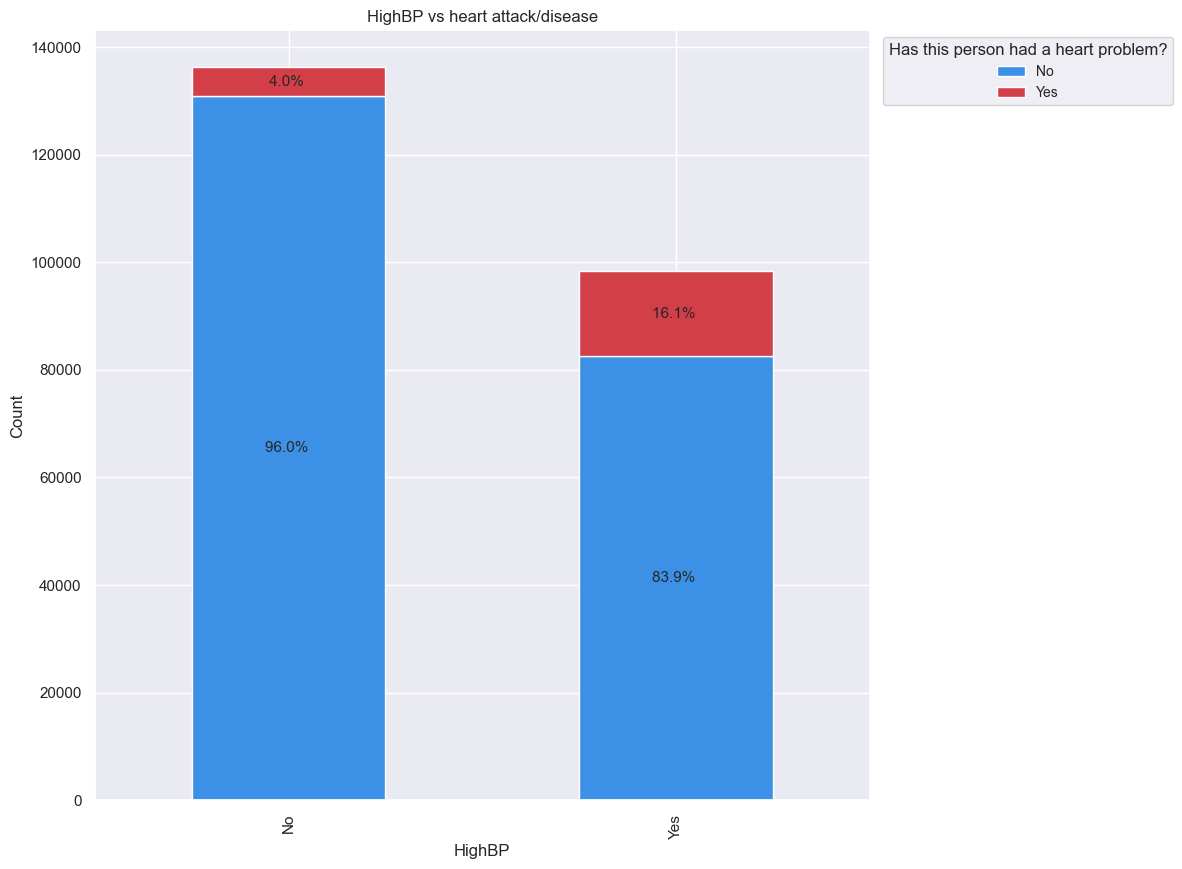

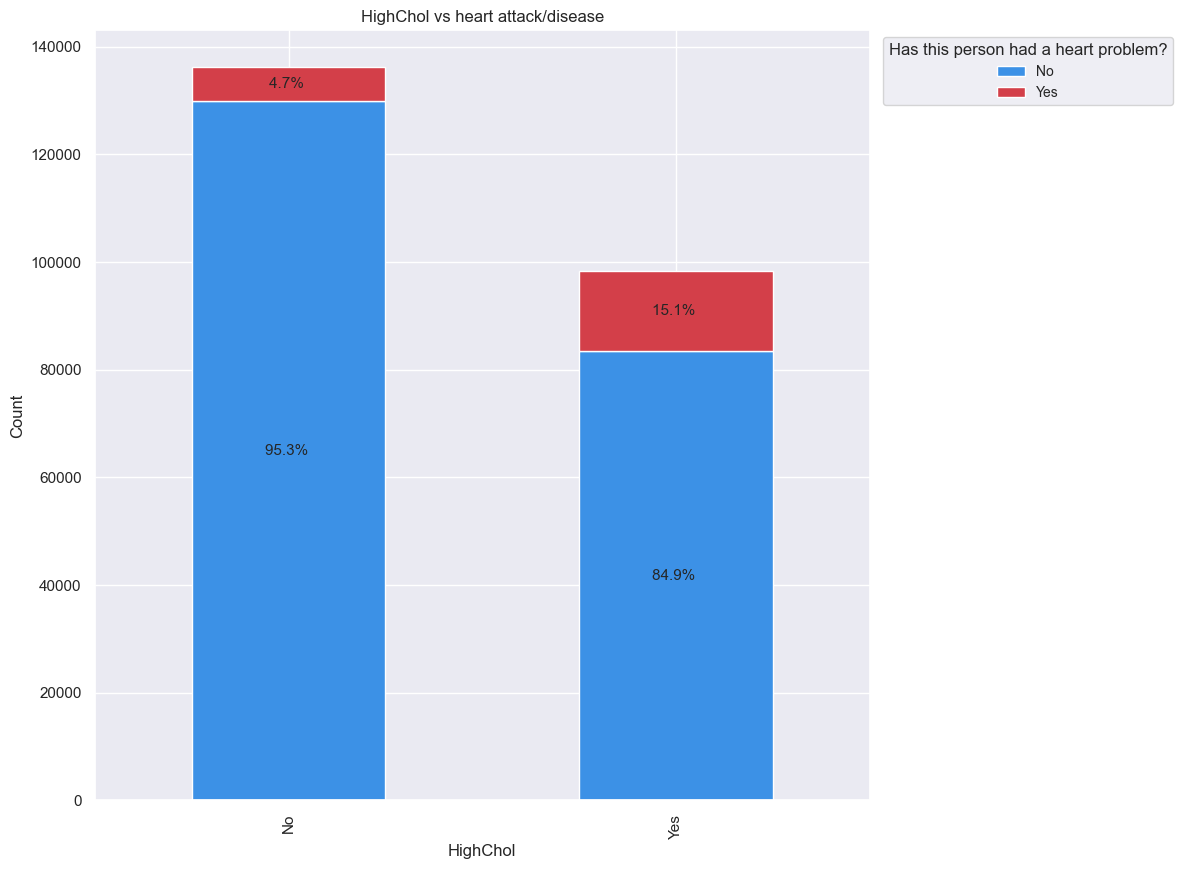

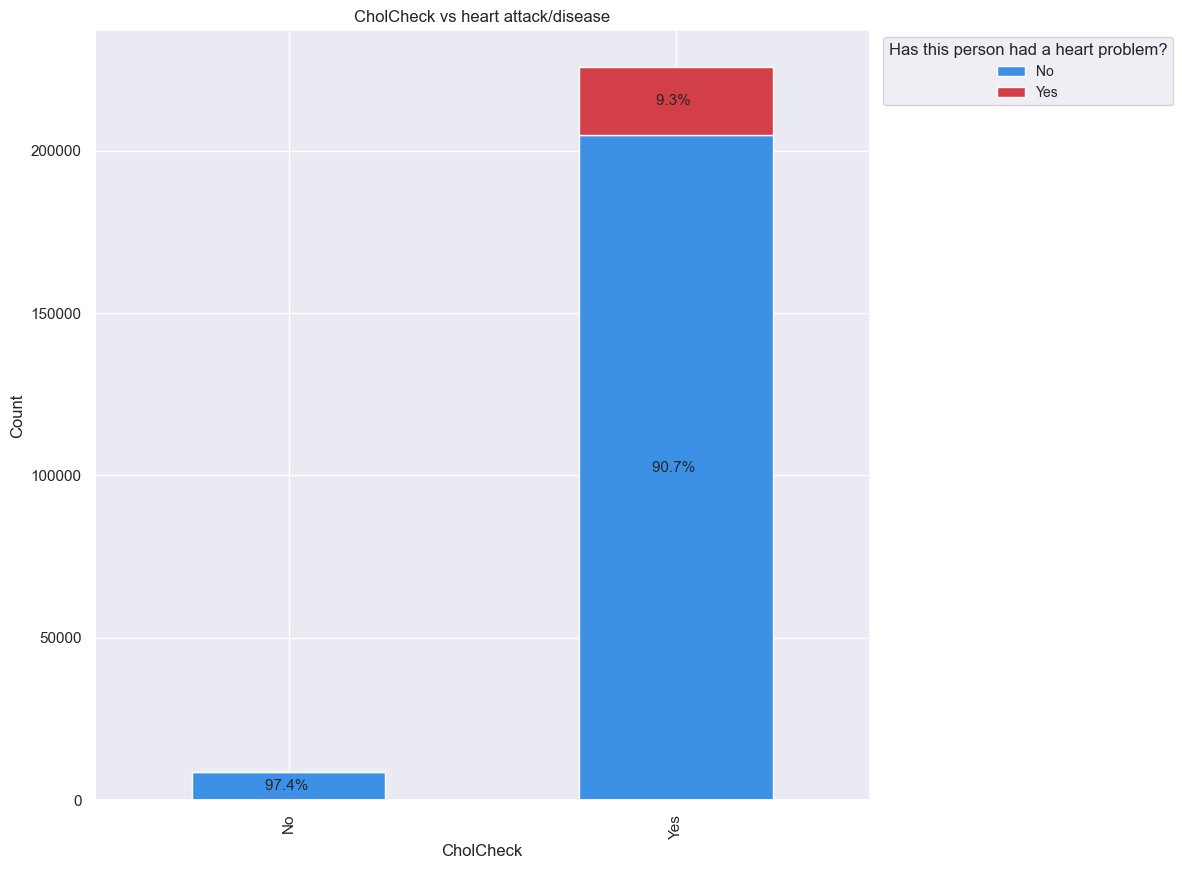

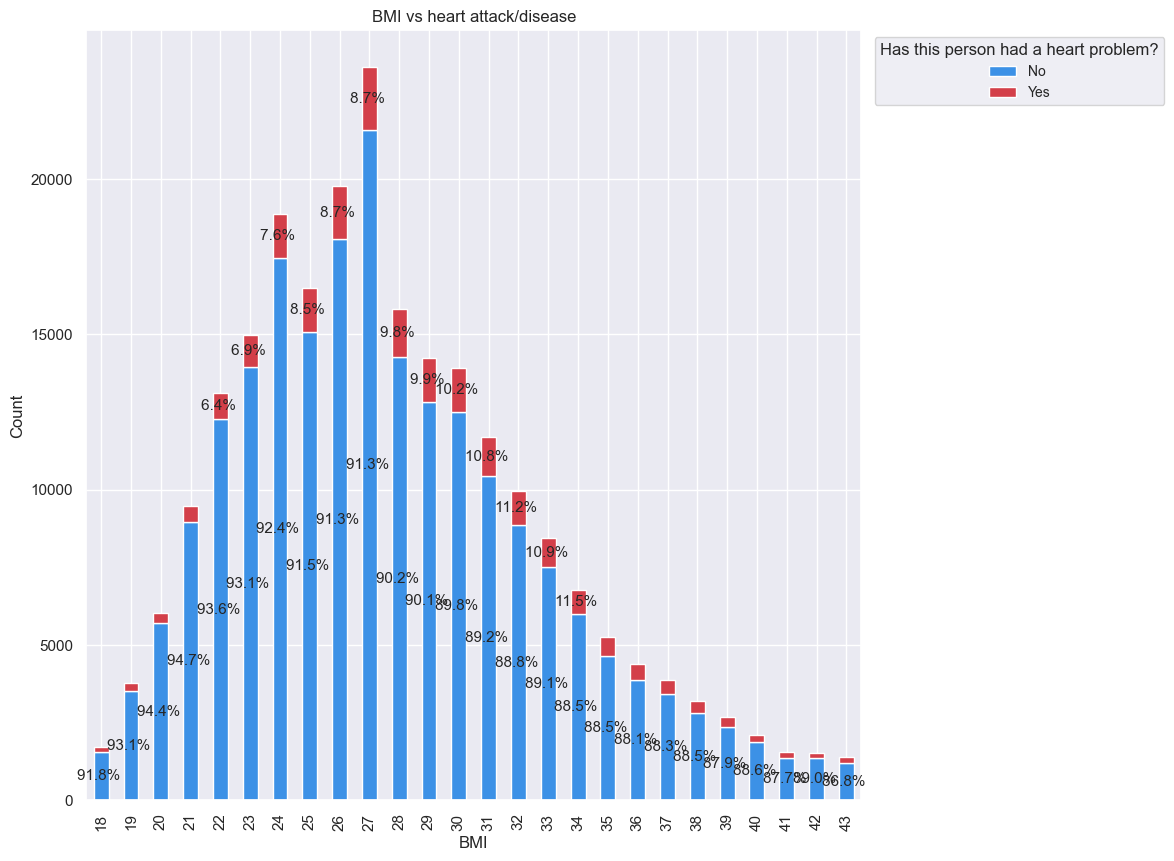

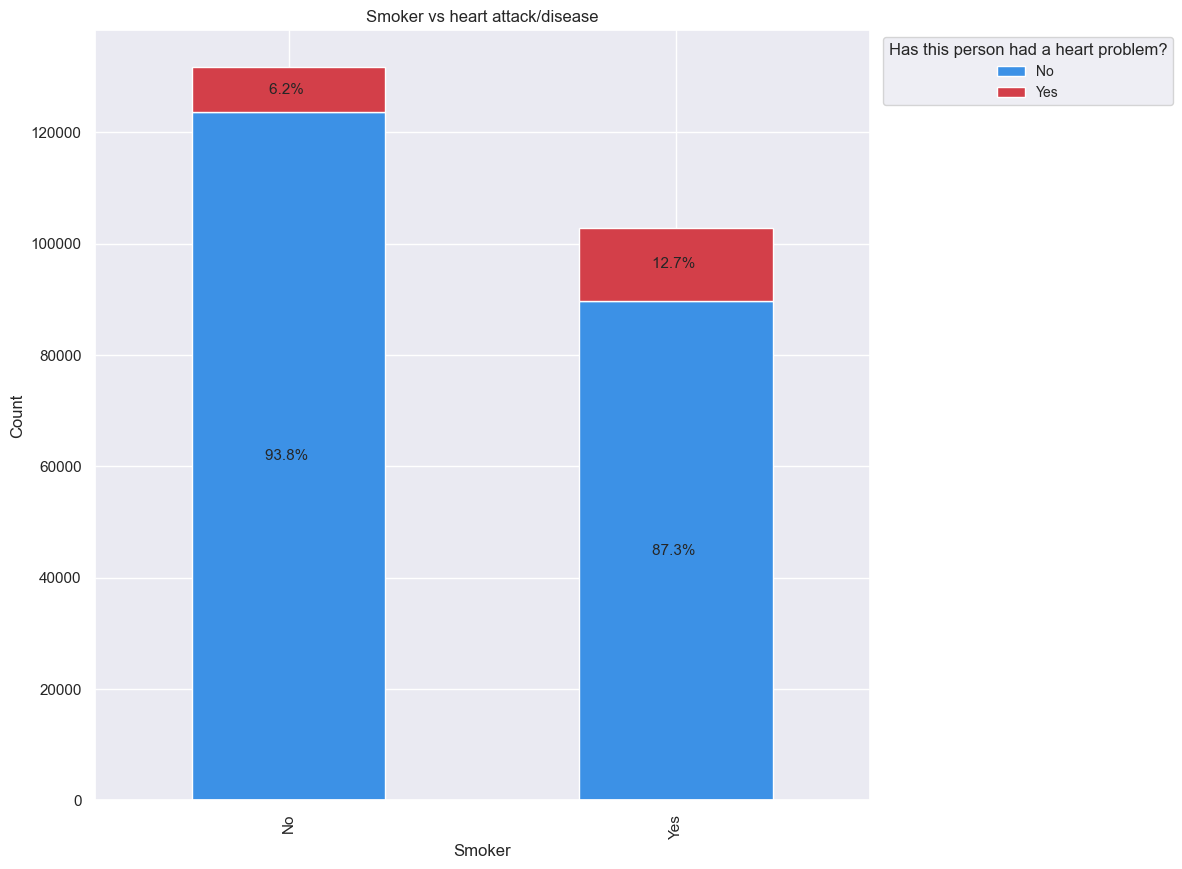

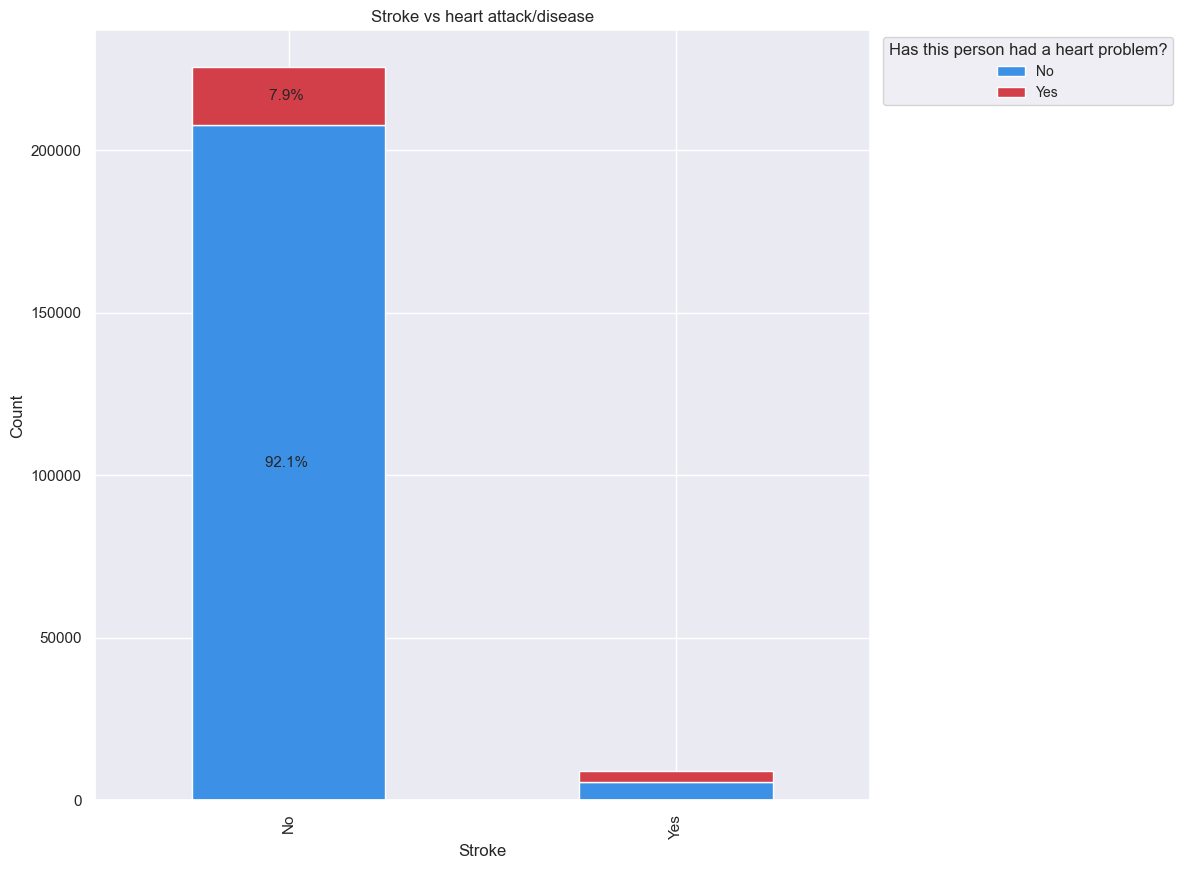

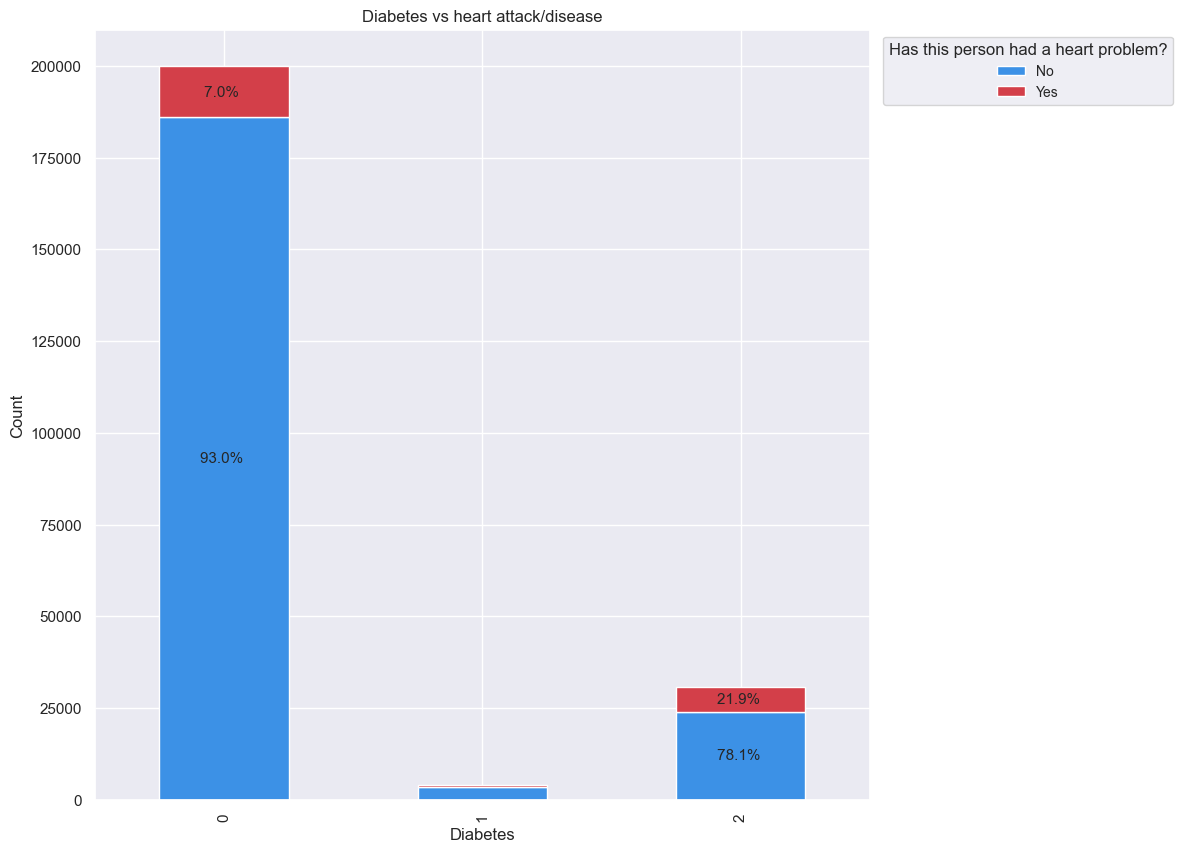

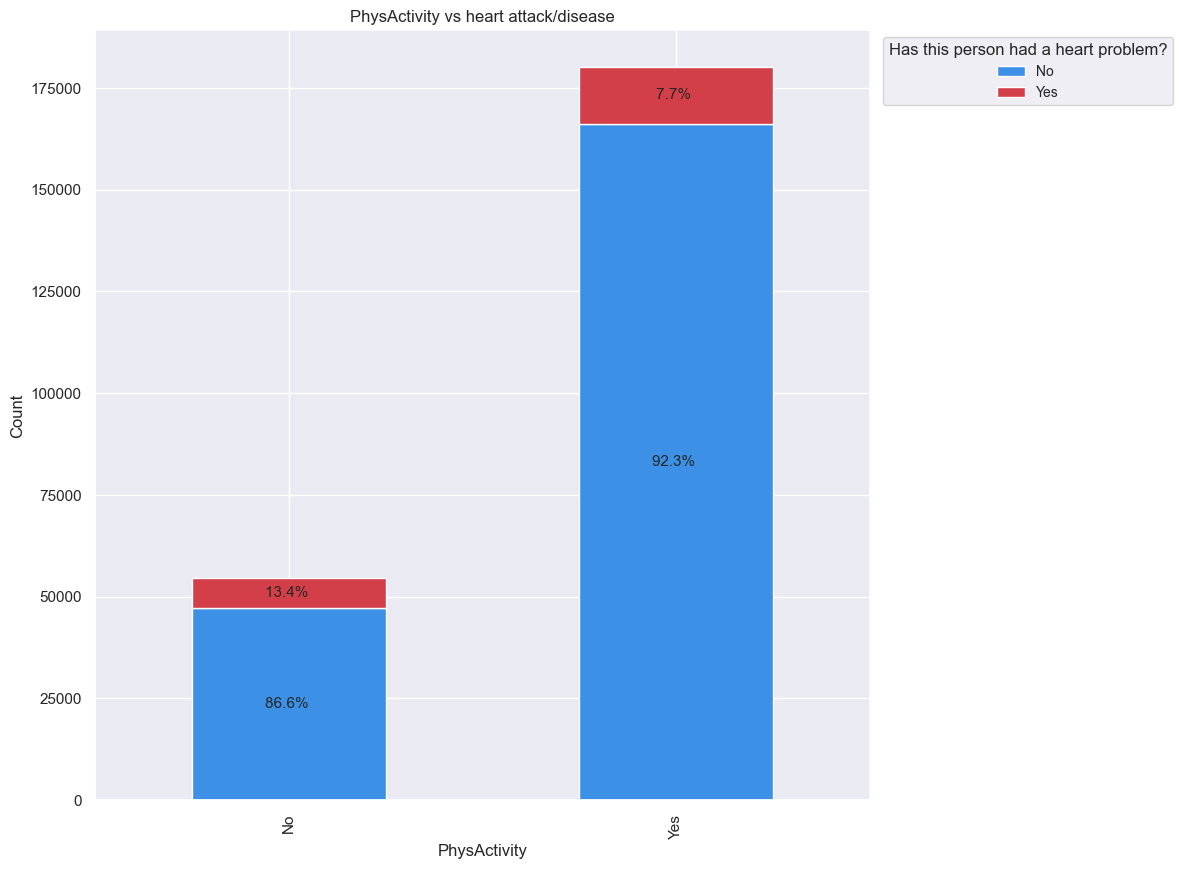

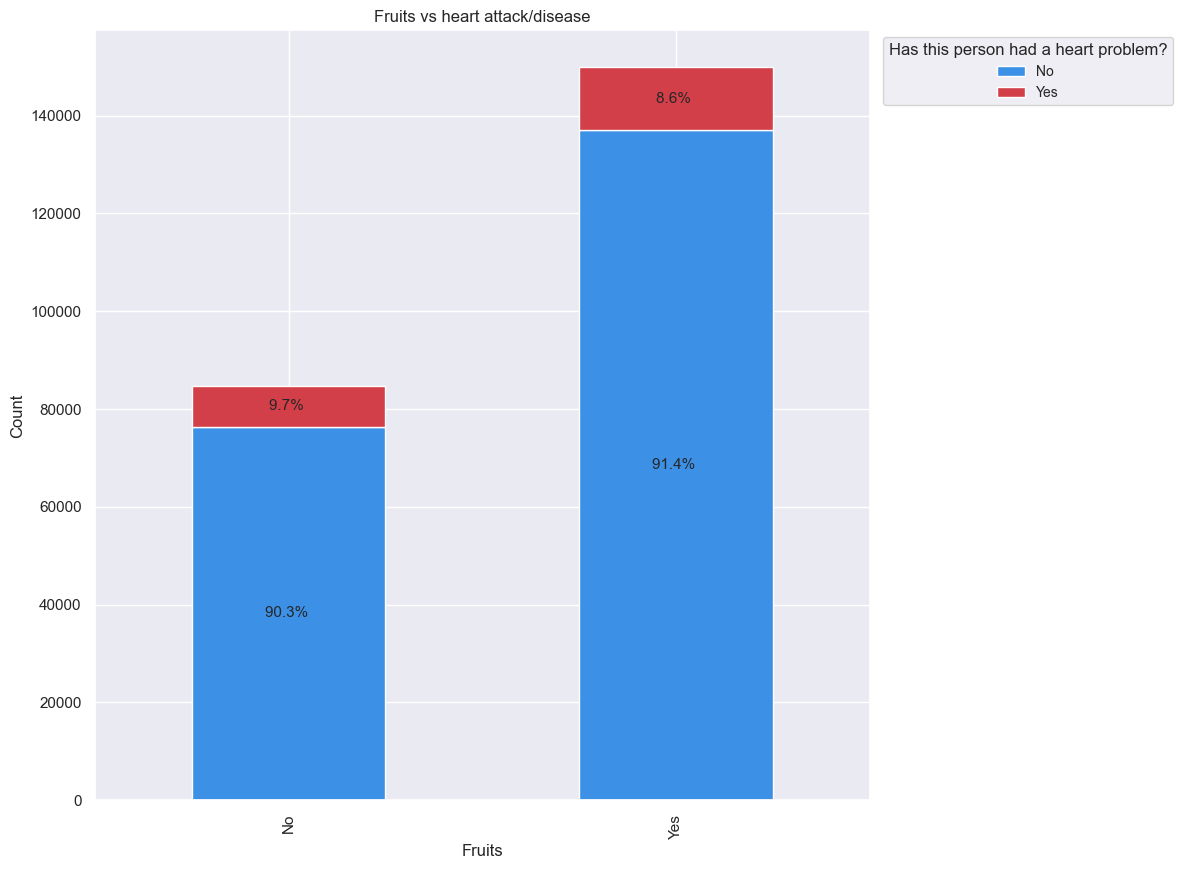

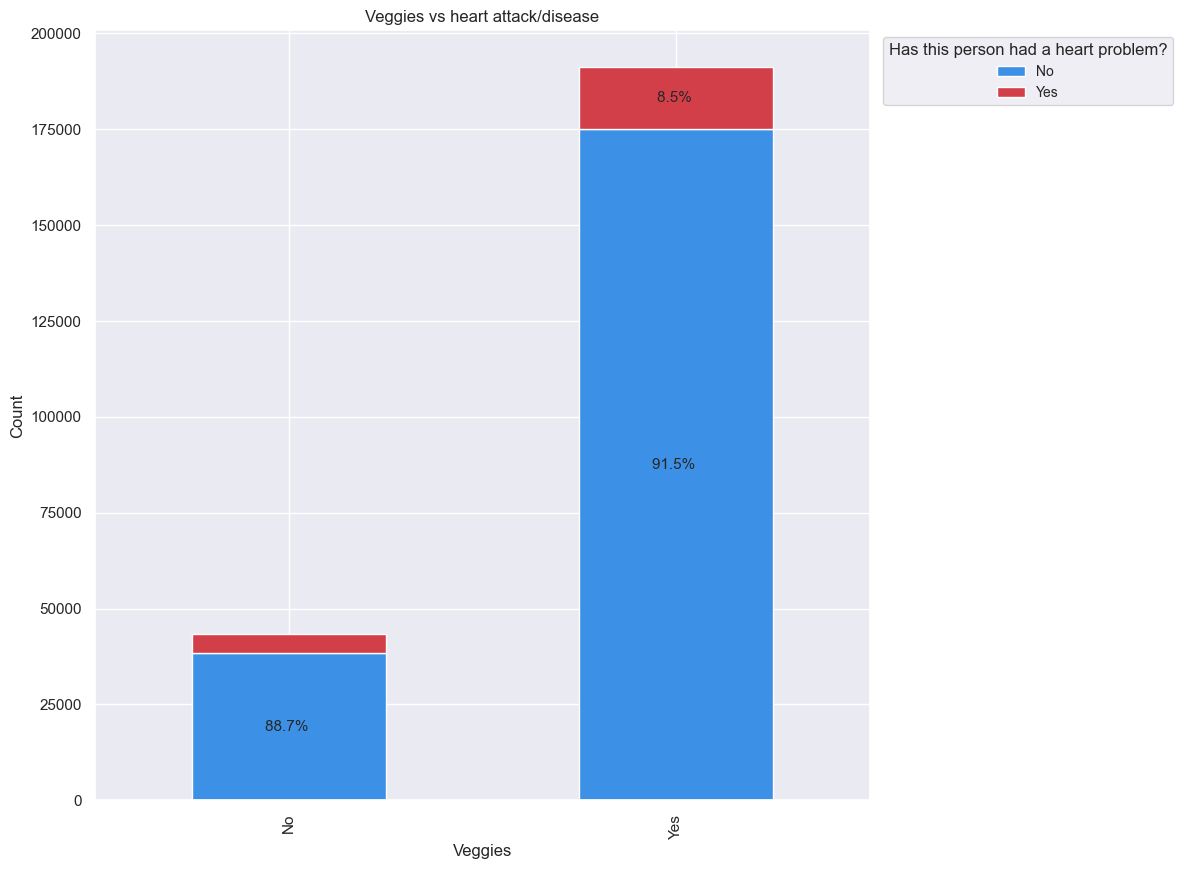

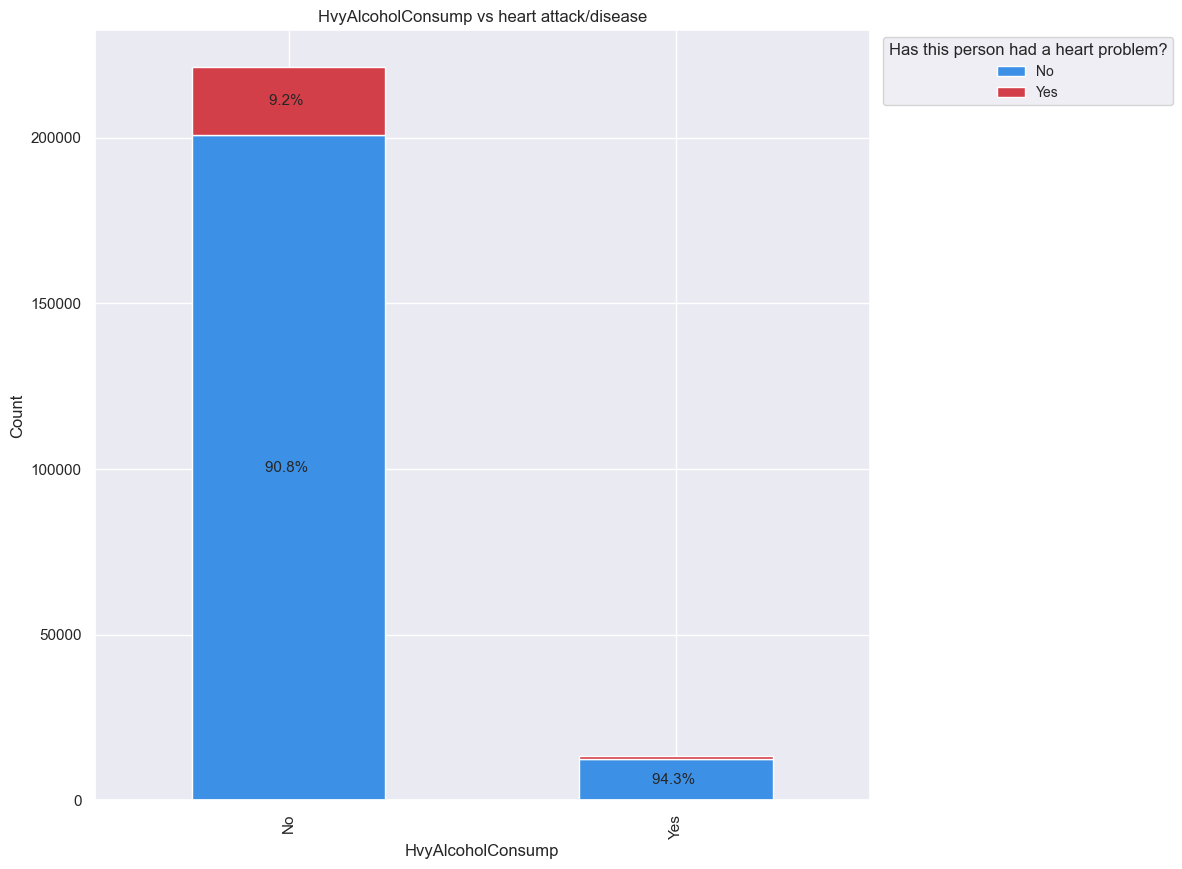

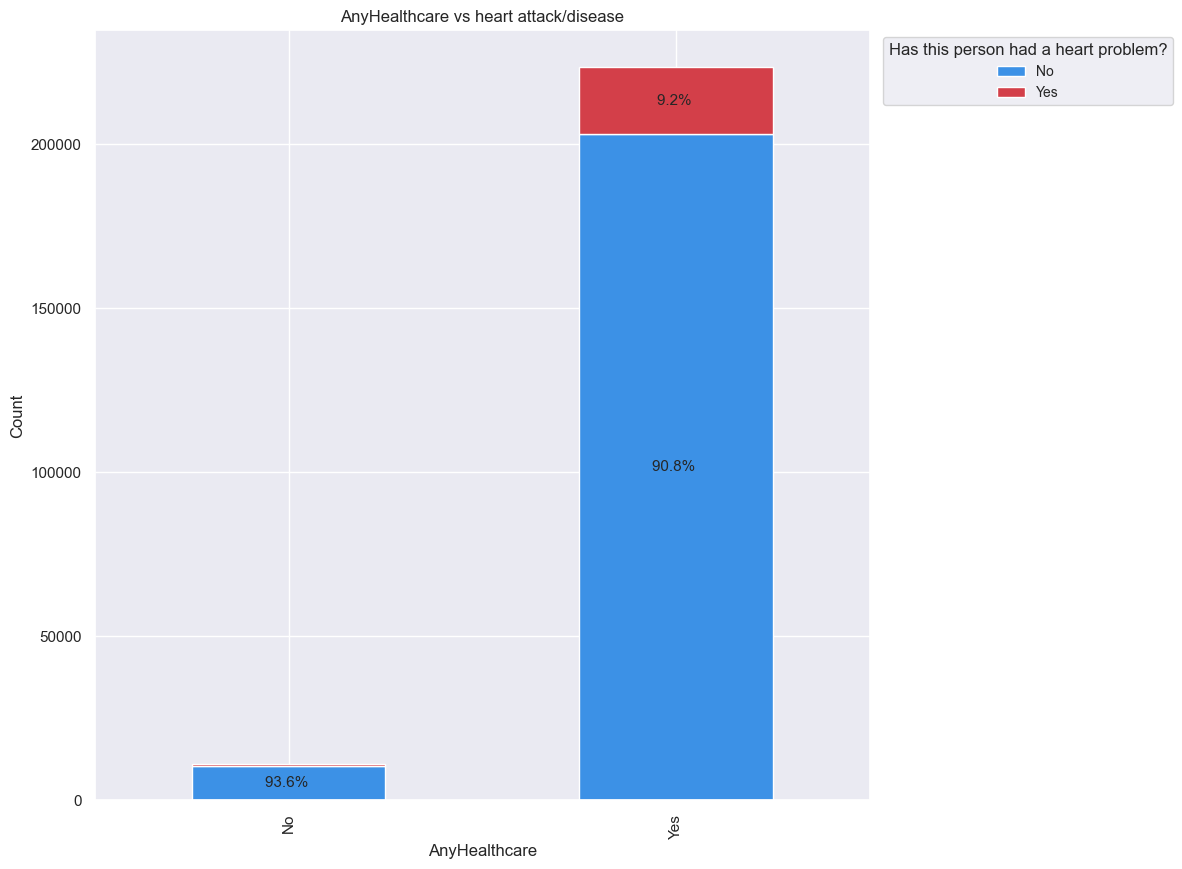

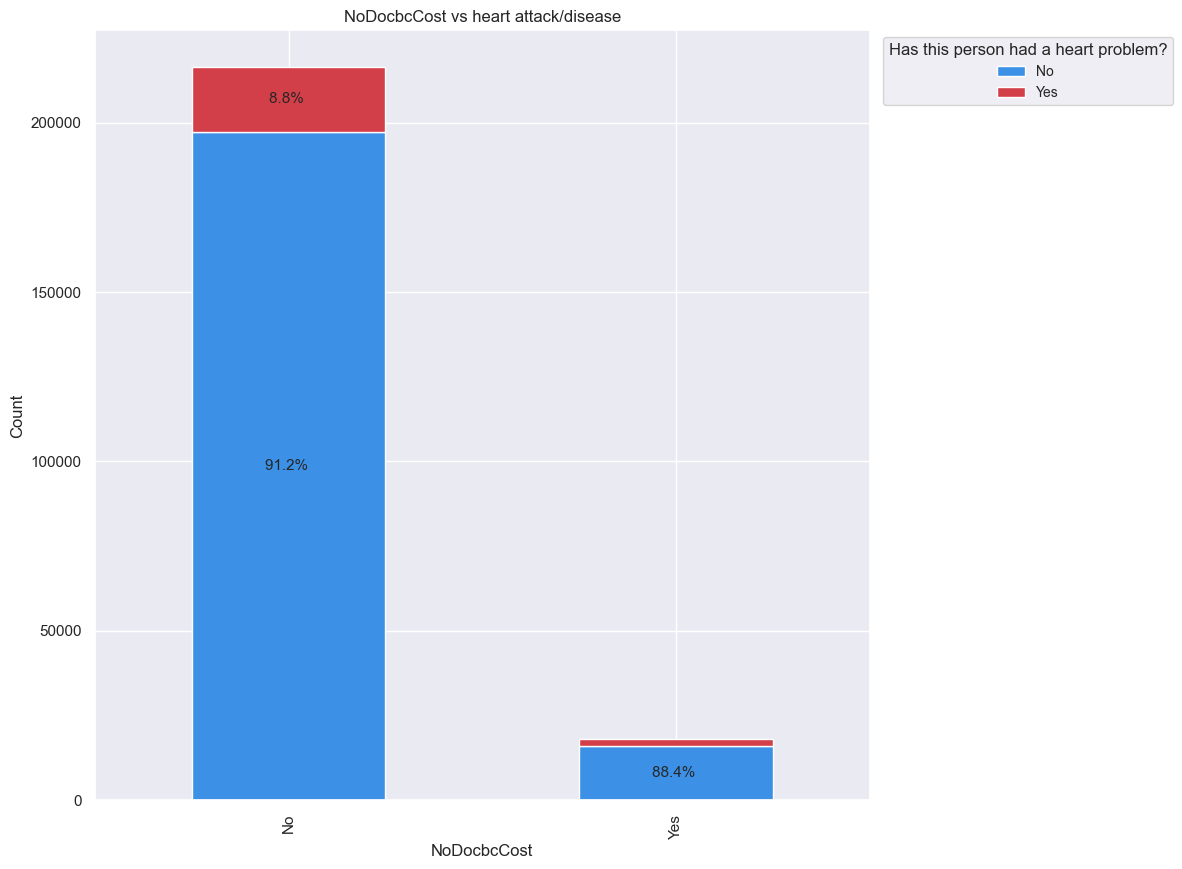

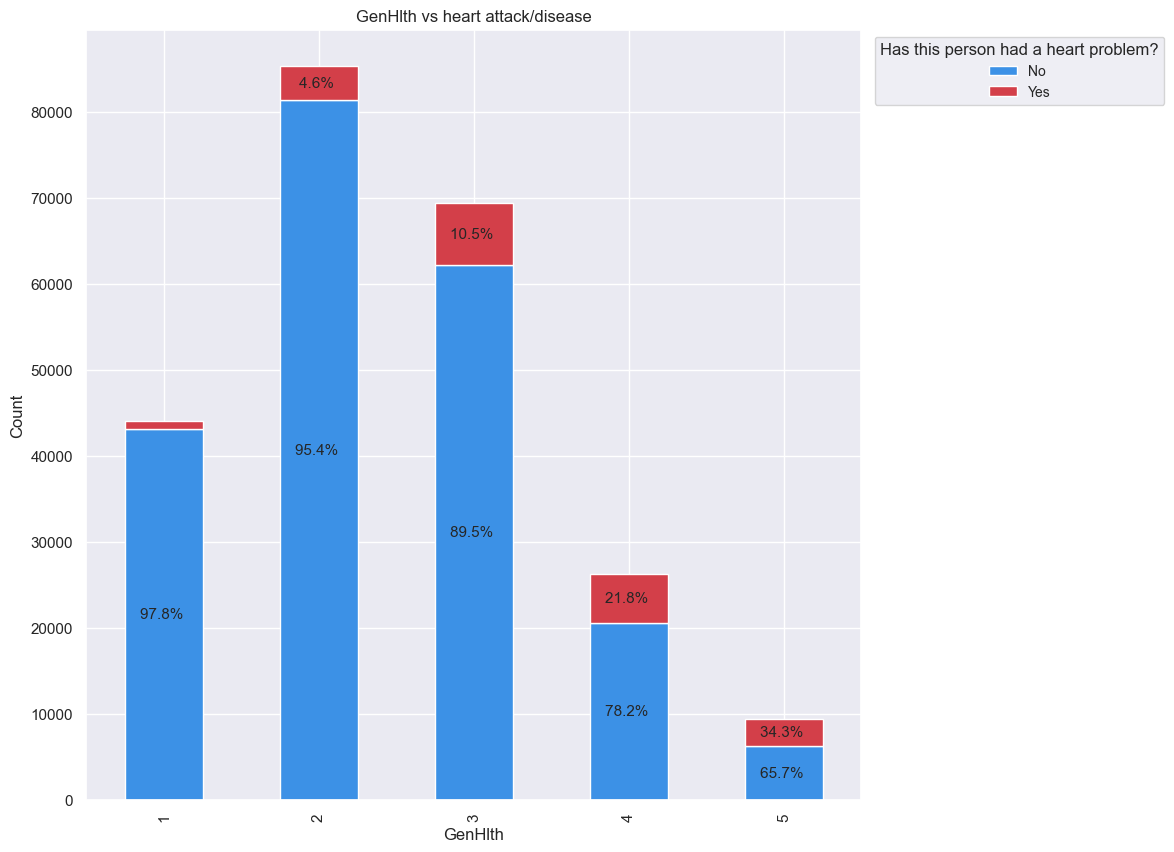

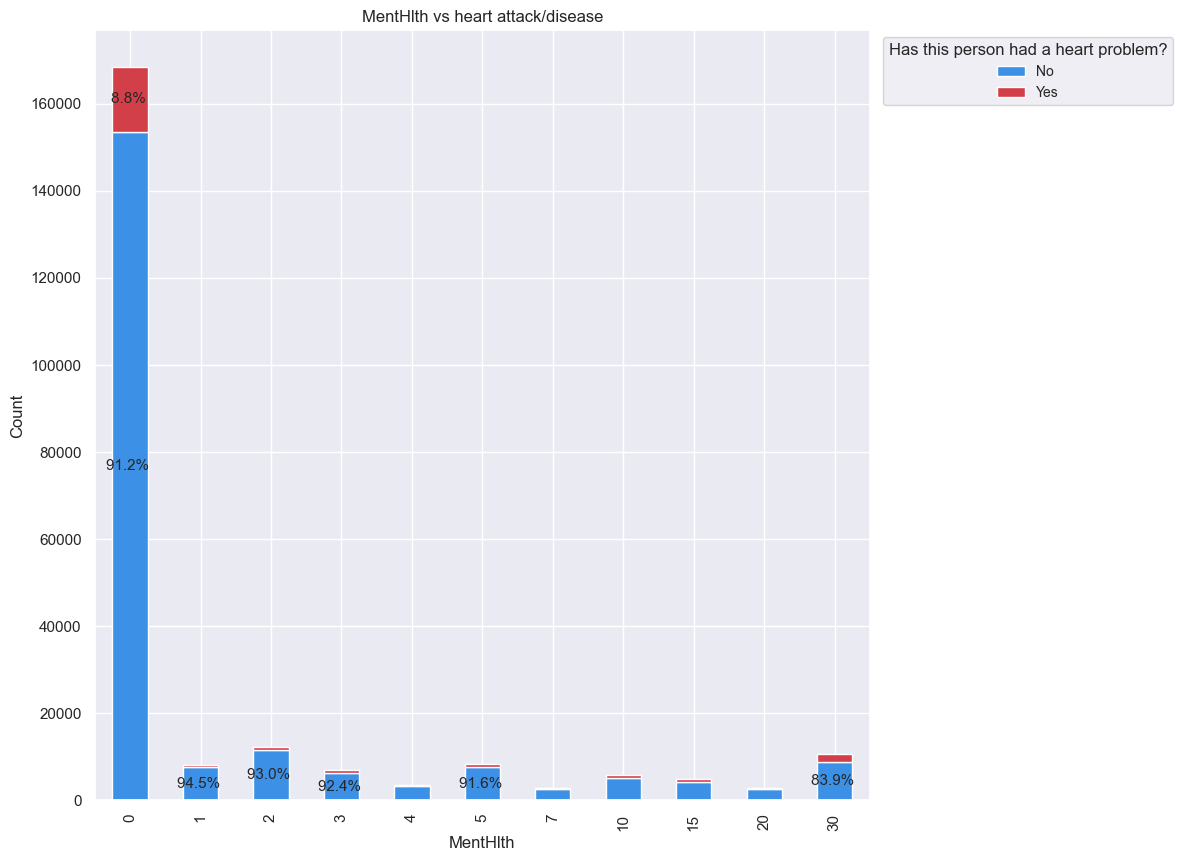

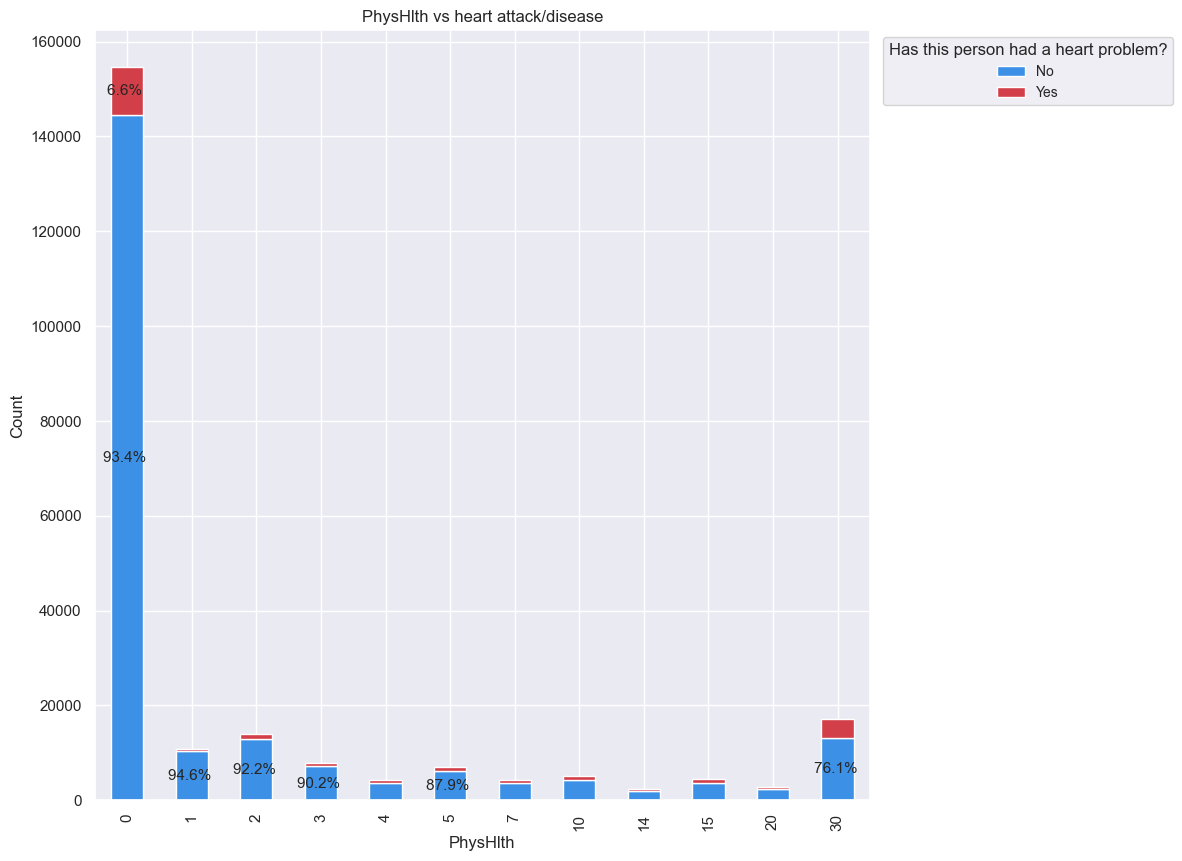

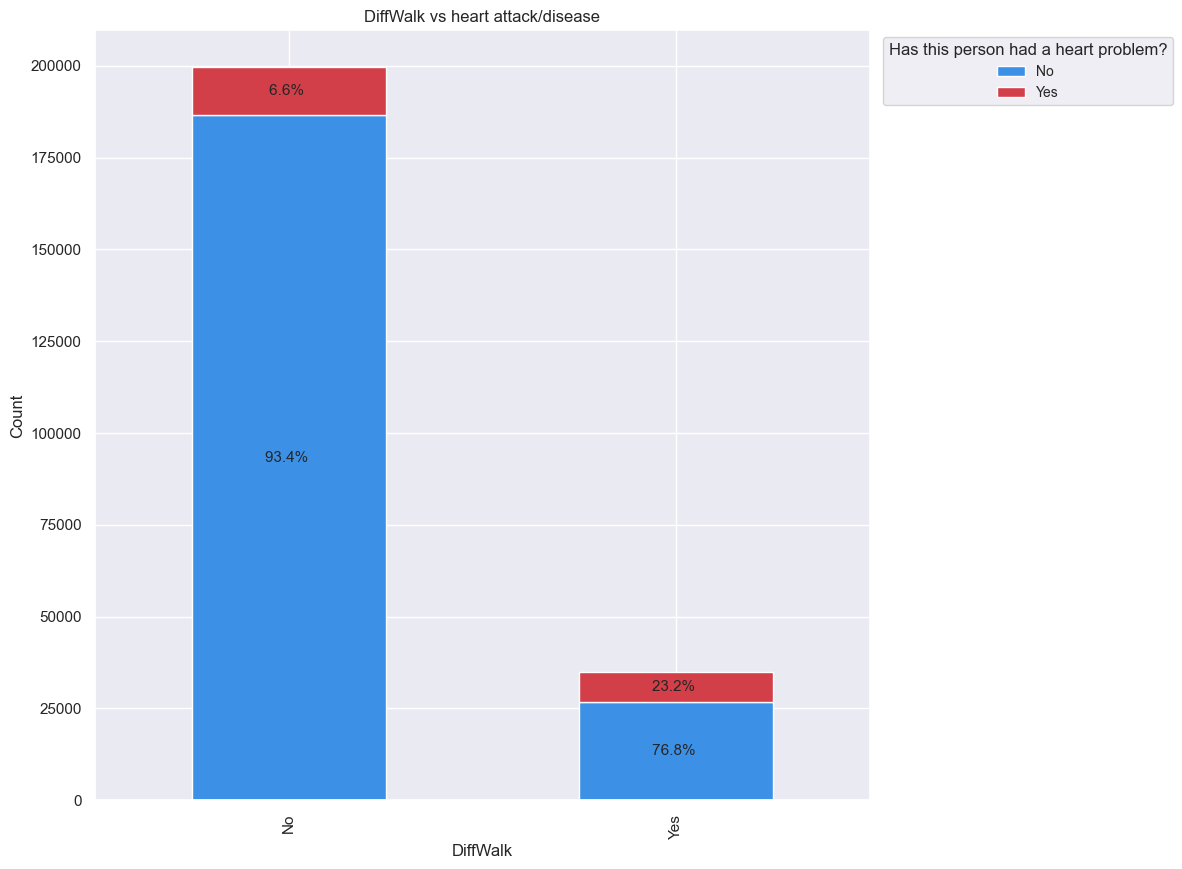

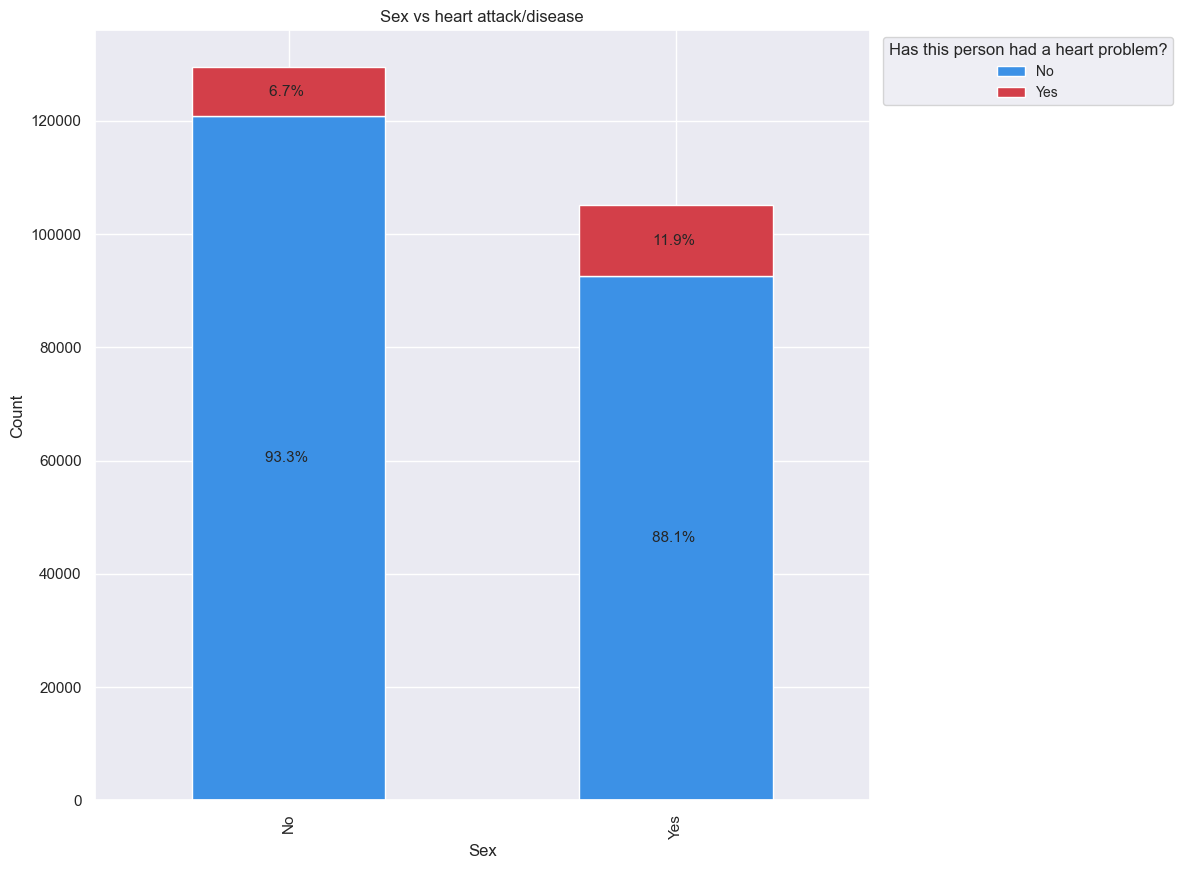

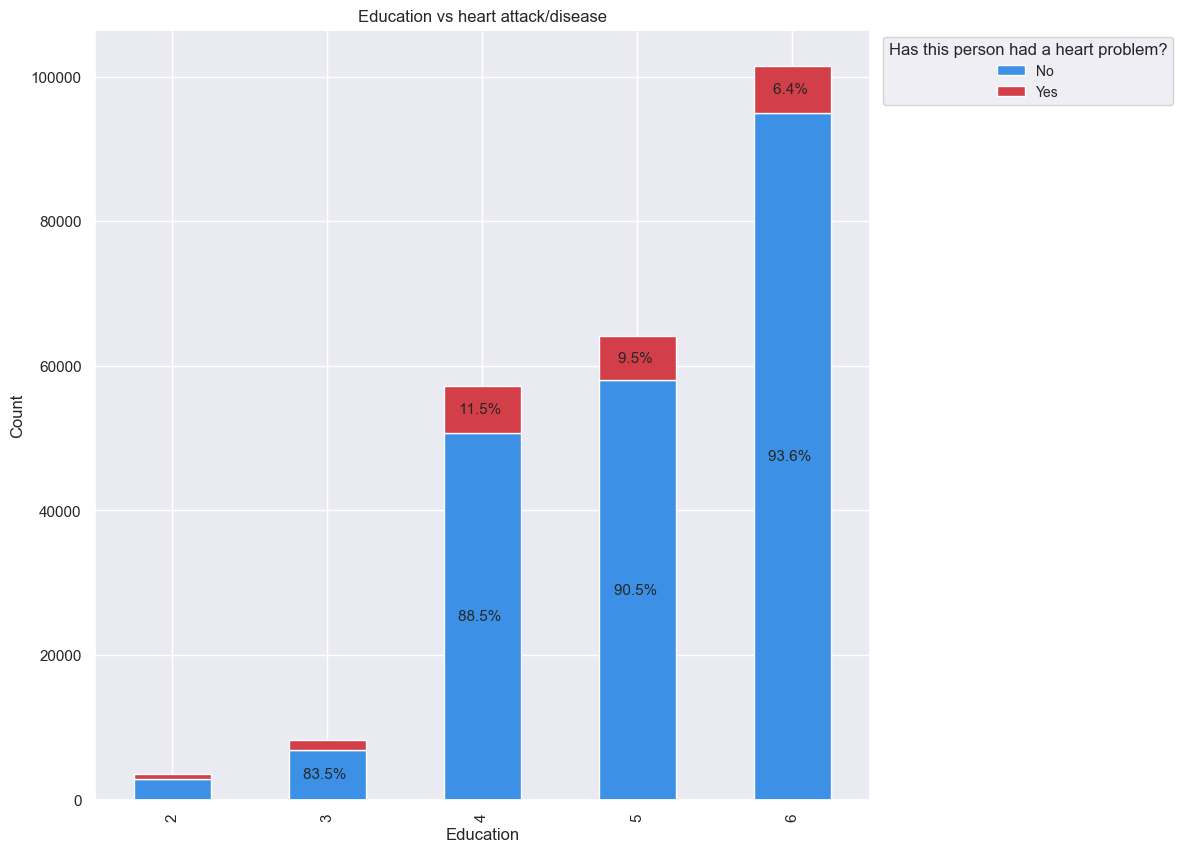

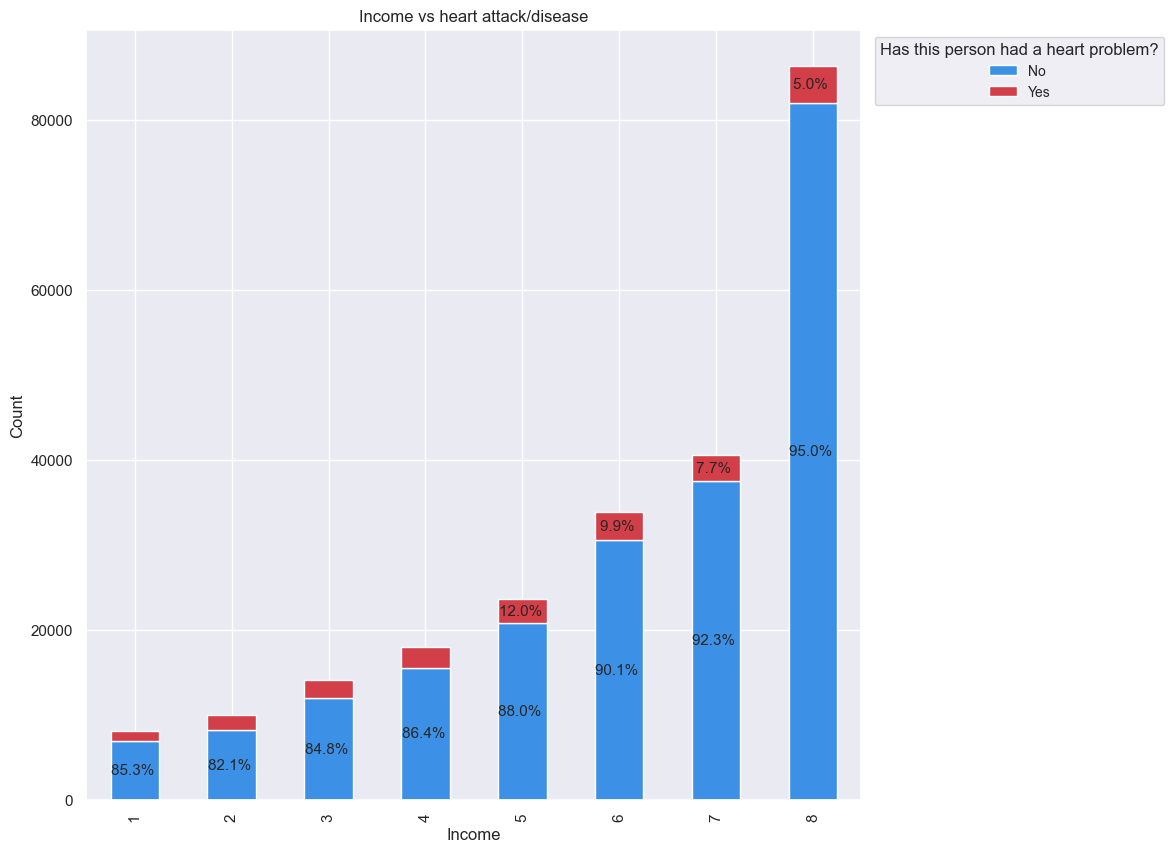

In [39]:
for column in['HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke','Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',  'GenHlth', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Education', 'Income']:
    plot = data_copy.pivot_table(index = [column], columns = 'HeartDiseaseorAttack', values = 'Age', aggfunc = 'count')
    plot_figure(plot,column + " vs heart attack/disease", 10)

C:\Users\admin\AppData\Local\Temp\ipykernel_14600\1858415810.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_copy_II= data_copy_II[data['HeartDiseaseorAttack'] != 0]


KeyboardInterrupt: 

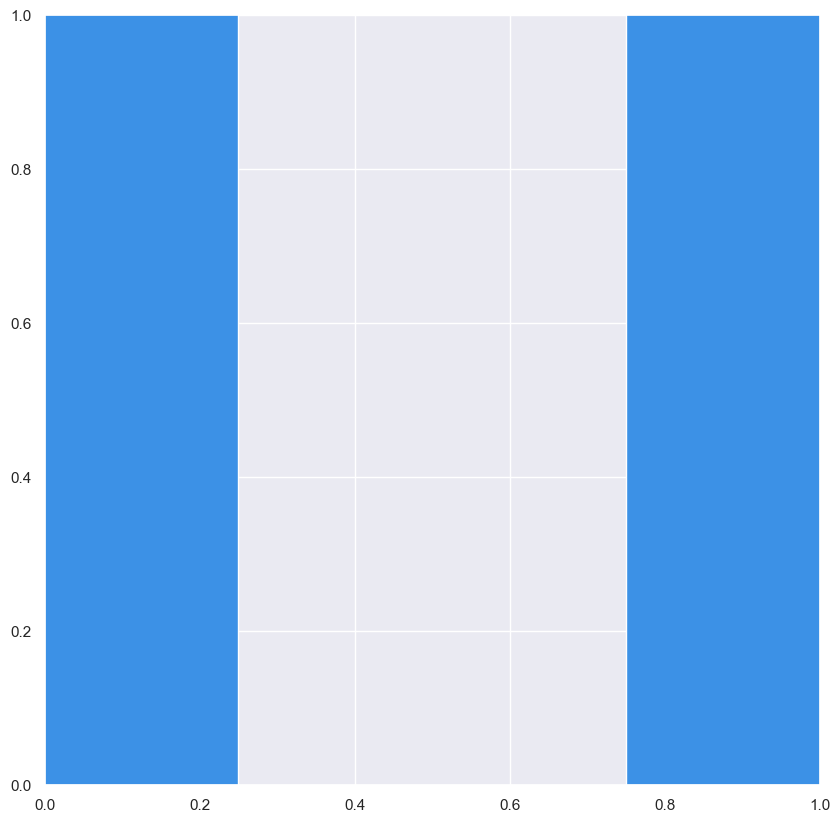

In [40]:
data_copy_II= data_copy.copy()

data_copy_II= data_copy_II[data['HeartDiseaseorAttack'] != 0]
data_copy_II= data_copy_II[['BMI']]

ax = data_copy_II.plot.bar(stacked=True, figsize=(10, 10), color=['#3c91e6', '#d33f49']) # making the plot and setting the colors and size
labels = []
min_font_size = 11  # setting a min font size for readability
percentage_threshold = 3  # displaying % labels if bars are above this threshold

#making the labels
for j in data_copy.columns['BMI']:
    for i in data_copy.index:
        if ((j == 0) and (data_copy.loc[i][j] < 10) and (data_copy.loc[i][j] < sum(data_copy.loc[i]))): # if the column is too small the label is empty for readability
            label = ""
        else:                                                                                                                       
            label = str(round((data_copy.loc[i][j]/sum(data_copy.loc[i]))*100,1)) + "% " # the column label and finding the % for the label
        labels.append(label)

#position of the label
indeks = 0
patches = ax.patches
for rect in patches:
    width = rect.get_width()
    if width > 0 and rect.get_height() / ax.get_ylim()[1] * 100 > percentage_threshold:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()

        font_size = max(min_font_size, min(8, 8 * width /10)) # calculating a dynamic font size based on the width of the bar

        ax.text(x + width / 2, y + height / 2, labels[indeks], ha='center', va='center', fontsize=font_size).get_window_extent()# Calculate the text width
    indeks += 1

#making the legend
legend = plt.legend(['No', 'Yes'], loc='upper right', title="Has this person had a heart problem?", fontsize='small', bbox_to_anchor=(1.40, 1))

#ax labels
ax.set_ylabel('Count')
if len(data_copy_II.index) == 2:
    ax.set_xticklabels(['No', 'Yes'])
else:
    ax.set_xticklabels(data_copy_II.index)

plt.title('BMI vs heart disease or attack')
plt.show()

-----------------------------------------------
# Modelling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc as AUC, accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE



In [ ]:
correlation_values = data.corr()['HeartDiseaseorAttack'] #.abs().sort_values(ascending=False)
p_values = {}

for feature in correlation_values.index:
    # Compute the correlation coefficient and p-value
    correlation_coeff, p_value = pearsonr(data[feature], data['HeartDiseaseorAttack'])
    p_values[feature] = p_value

p_values = pd.DataFrame(list(p_values.items()), columns=['Feature', 'P-Value'])
correlation_values.index.name = 'Feature'  
correlations_and_p_values = pd.concat([correlation_values, p_values.set_index('Feature')['P-Value']], axis=1).sort_values(by='HeartDiseaseorAttack', ascending=False)
#print(correlations_and_p_values)

#Remove random rows so that positve labels count == negative labels count
#amount_to_remove = data.shape[0] - 2*data[data['HeartDiseaseorAttack']==1.0].shape[0]
#elements_to_remove = data[data['HeartDiseaseorAttack']==0.0].index
#rows_for_droping = np.random.choice(elements_to_remove, size=amount_to_remove,replace=False)
#data.drop(rows_for_droping,inplace=True)


data.drop(data[data['BMI'] >= 60].index,inplace=True)
#creating the feature and label data
features = data.drop(columns='HeartDiseaseorAttack',axis=1)
labels = data['HeartDiseaseorAttack']


smote = SMOTE(random_state=4,sampling_strategy=1)
features, labels = smote.fit_resample(features,labels)
print(np.unique(labels,return_counts=True))

#controll for checking that exist the same ammount
#print(data.shape[0] == data[data['HeartDiseaseorAttack']==0.0].shape[0] + data[data['HeartDiseaseorAttack']==1.0].shape[0])
#print(data.shape)
#print(f"with heartattack with 0: {data[data['HeartDiseaseorAttack']==0.0].shape[0]}")
#print(f"with heartattack with 1: {data[data['HeartDiseaseorAttack']==1.0].shape[0]}")


#Droping following columns because of low correlation
features.drop(columns='NoDocbcCost',axis=1,inplace=True)
features.drop(columns='Fruits',axis=1,inplace=True)
features.drop(columns='Veggies',axis=1,inplace=True)
features.drop(columns='AnyHealthcare',axis=1,inplace=True)
features.drop(columns='HvyAlcoholConsump',axis=1,inplace=True)
features.drop(columns='CholCheck',axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.25, random_state=4)

#for hyperparameter tuning and CV
X_training, X_validation, y_training, y_validation = train_test_split(X_train,y_train, test_size=0.25, random_state=4)

#Use standard scaling on training,validation and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  #fits and transforms the data
X_training = scaler.transform(X_training)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

#pca = PCA(n_components=5)
#X_train = pca.fit_transform(X_train) 
#X_training = pca.transform(X_training)
#X_validation = pca.transform(X_validation)
#X_test = pca.transform(X_test)


(array([0, 1]), array([228998, 228998], dtype=int64))


In [ ]:
def objective(trial):

    parameters = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
    }
    
    classifier_obj = RandomForestClassifier(**parameters)
    classifier_obj.fit(X_training,y_training)
    prediction = classifier_obj.predict(X_validation)

    return accuracy_score(y_validation,prediction)

studyRandom = optuna.create_study(direction="maximize")
studyRandom.optimize(objective, n_trials=100,n_jobs=-1)
print(studyRandom.best_trial)

[I 2023-12-08 22:39:18,208] A new study created in memory with name: no-name-fd0f1c19-0e7f-4335-b28f-2058a740882f


In [ ]:
def objective2(trial):

    parameters ={
    'n_neighbors': trial.suggest_int('n_neighbors',2,25,1),
    'weights' : trial.suggest_categorical('weights',['uniform','distance'])
}
    
    classifier_obj = KNeighborsClassifier(**parameters)
    classifier_obj.fit(X_training,y_training)
    prediction = classifier_obj.predict(X_validation)

    return accuracy_score(y_validation,prediction)


studyKNN = optuna.create_study(direction="maximize")
studyKNN.optimize(objective2, n_trials=100,n_jobs=-1)
print(studyKNN.best_trial)

[I 2023-12-08 22:40:21,586] A new study created in memory with name: no-name-ff7bfd1b-3cce-4d77-82db-0f9b8891d248


In [ ]:
def objective3(trial):

    parameters = {
    'C': trial.suggest_categorical('C',[0.001, 0.01, 0.1, 1, 10, 100]),
    'penalty': trial.suggest_categorical('penalty',['l1', 'l2']),
    'solver': trial.suggest_categorical('solver',['liblinear', 'saga'])  #'lbfgs',
}
    
    classifier_obj = LogisticRegression(**parameters)
    classifier_obj.fit(X_training,y_training)
    prediction = classifier_obj.predict(X_validation)

    return accuracy_score(y_validation,prediction)


studyLog = optuna.create_study(direction="maximize")
studyLog.optimize(objective3, n_trials=100,n_jobs=-1)
print(studyLog.best_trial)

[I 2023-12-09 12:24:24,773] A new study created in memory with name: no-name-ed6f95ef-3e6e-4c5d-b82e-20efb59c9665
[I 2023-12-09 12:24:28,069] Trial 3 finished with value: 0.7350334788937409 and parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 3 with value: 0.7350334788937409.
[I 2023-12-09 12:24:28,211] Trial 2 finished with value: 0.7355574963609898 and parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 2 with value: 0.7355574963609898.
[I 2023-12-09 12:24:28,864] Trial 0 finished with value: 0.7353595342066958 and parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}. Best is trial 2 with value: 0.7355574963609898.
[I 2023-12-09 12:24:30,771] Trial 6 finished with value: 0.7350451237263464 and parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 2 with value: 0.7355574963609898.
[I 2023-12-09 12:24:34,459] Trial 1 finished with value: 0.7353129548762737 and parameters: {'C': 0.001, 'penalty'

FrozenTrial(number=86, state=1, values=[0.735604075691412], datetime_start=datetime.datetime(2023, 12, 9, 12, 25, 44, 325840), datetime_complete=datetime.datetime(2023, 12, 9, 12, 25, 46, 832457), params={'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': CategoricalDistribution(choices=(0.001, 0.01, 0.1, 1, 10, 100)), 'penalty': CategoricalDistribution(choices=('l1', 'l2')), 'solver': CategoricalDistribution(choices=('liblinear', 'saga'))}, trial_id=86, value=None)


In [ ]:
def plot_ROC(name,fpr,tpr,roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      5978
           1       0.75      0.82      0.78      5926

    accuracy                           0.77     11904
   macro avg       0.78      0.77      0.77     11904
weighted avg       0.78      0.77      0.77     11904



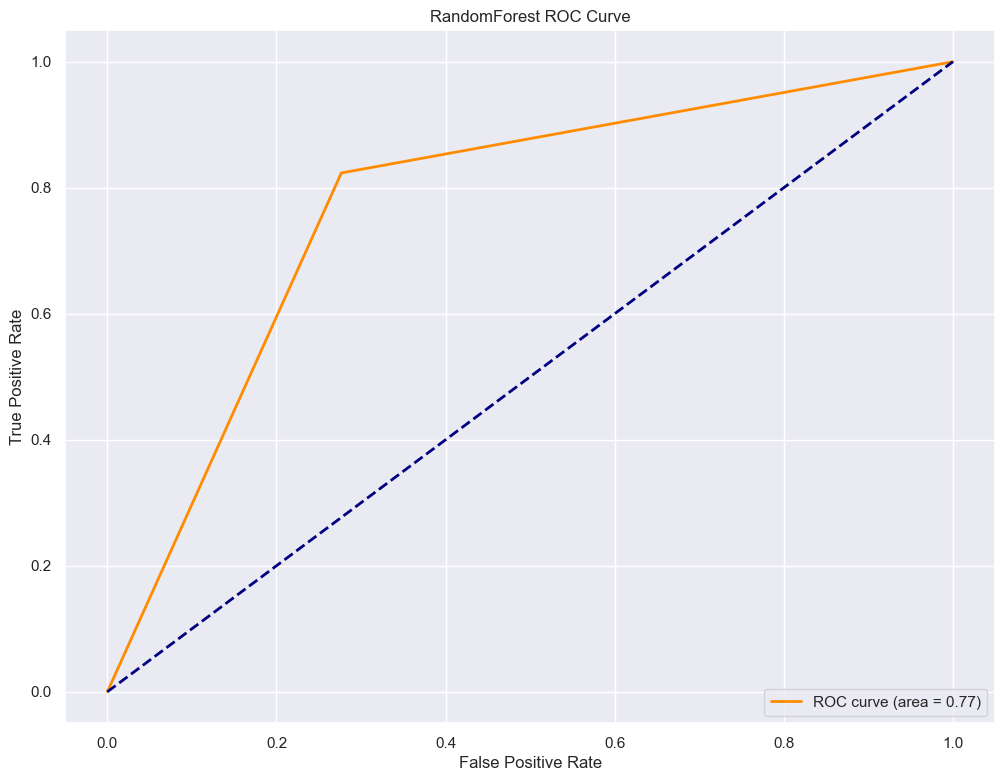

In [ ]:
#print(KNN_best)
#print(Random_forest_best)
rand = RandomForestClassifier(**studyRandom.best_params)
rand.fit(X_train,y_train)
pred = rand.predict(X_test)
#print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

fpr, tpr, thresholds = roc_curve(y_test,pred)
auc_score = AUC(fpr,tpr)
plot_ROC('RandomForest',fpr,tpr,auc_score)


              precision    recall  f1-score   support

           0       0.80      0.71      0.75      5978
           1       0.74      0.82      0.77      5926

    accuracy                           0.76     11904
   macro avg       0.77      0.76      0.76     11904
weighted avg       0.77      0.76      0.76     11904



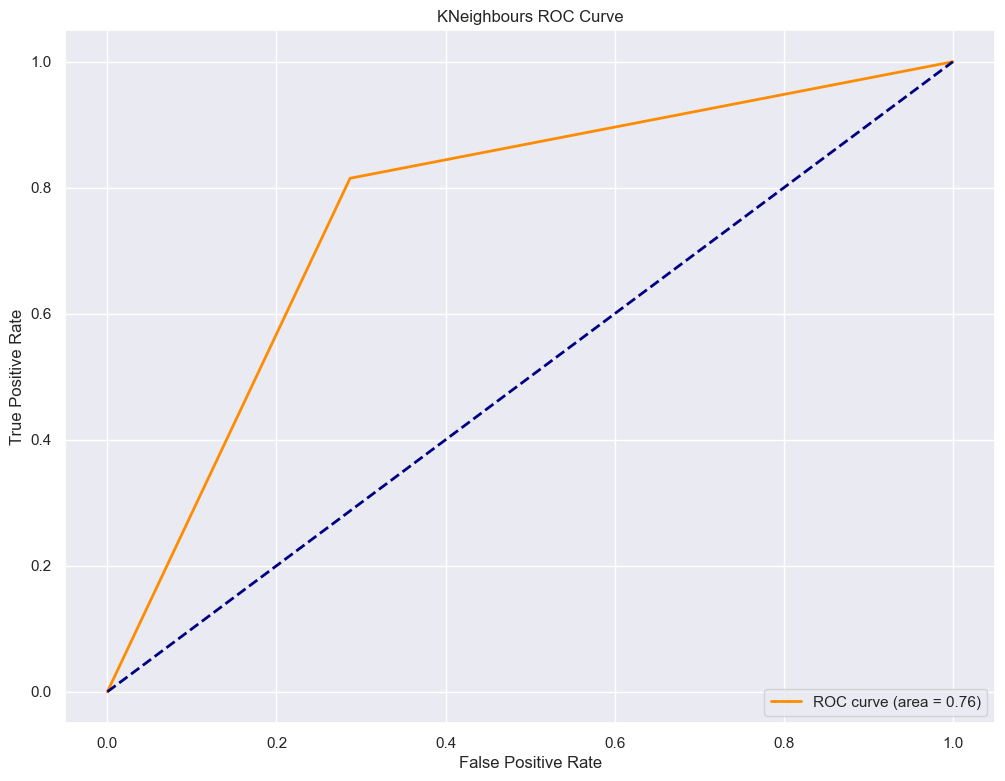

In [ ]:
knn = KNeighborsClassifier(**studyKNN.best_params)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
#print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

fpr, tpr, thresholds = roc_curve(y_test,pred)
auc_score = AUC(fpr,tpr)
plot_ROC('KNeighbours',fpr,tpr,auc_score)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      5978
           1       0.76      0.80      0.78      5926

    accuracy                           0.77     11904
   macro avg       0.77      0.77      0.77     11904
weighted avg       0.77      0.77      0.77     11904



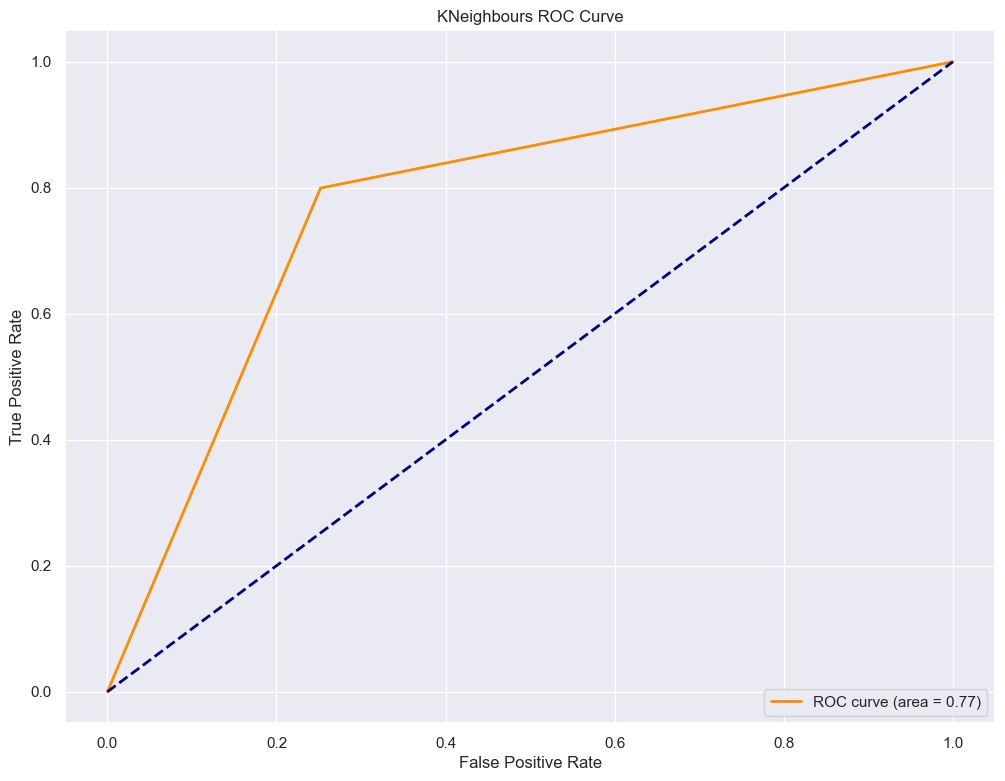

In [ ]:
log = LogisticRegression(**studyLog.best_params)
log.fit(X_train,y_train)
pred = log.predict(X_test)
#print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

fpr, tpr, thresholds = roc_curve(y_test,pred)
auc_score = AUC(fpr,tpr)
plot_ROC('KNeighbours',fpr,tpr,auc_score)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      5978
           1       0.76      0.81      0.78      5926

    accuracy                           0.78     11904
   macro avg       0.78      0.78      0.78     11904
weighted avg       0.78      0.78      0.78     11904



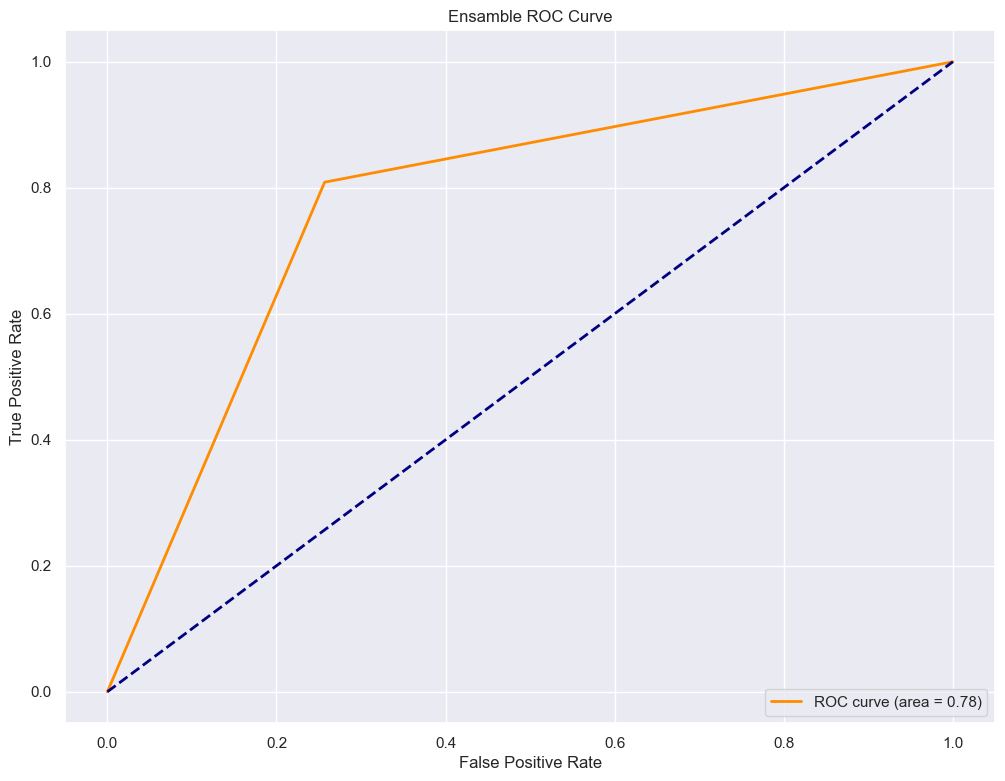

In [ ]:
classifier_group =[
    ('rf',rand),
    ('knn',knn),
    ('log',log)
]
ensamble = StackingClassifier(estimators=classifier_group)
ensamble.fit(X_train,y_train)
pred = ensamble.predict(X_test)
#print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

fpr, tpr, thresholds = roc_curve(y_test,pred)
auc_score = AUC(fpr,tpr)
plot_ROC('Ensamble',fpr,tpr,auc_score)